

## Definición del Problema

La base de datos contempla una muestra de estudiantes que se desvincularon de su escuela en algún momento entre abril y julio del año 2022, definido por la variable `DropoutDate`. Estar desvinculado de la escuela implica estar fuera del sistema escolar, es decir, fuera de la nómina de cualquier escuela pública del país. Algunos estudiantes logran revincularse a una escuela (sea la misma u otra), mientras que otros no.

El 28 de junio de 2022, el MINEDUC envió a cada escuela un reporte sobre la situación de los estudiantes desvinculados de esa escuela que, al 30 de mayo de 2022, no habían logrado revincularse a ninguna escuela (sea la misma u otra). La variable `ListedInDropoutReport` toma el valor 1 si el estudiante está listado en el reporte, y 0 si no. El objetivo del reporte es que las escuelas activen sus redes locales para lograr la revinculación de los estudiantes listados en el reporte, sea en la misma escuela que abandonaron u otra.

Al 31 de agosto de 2022, algunos estudiantes habían logrado revincularse al sistema educacional, es decir, reingresaron a una escuela (sea la misma u otra), lo cual puede medirse por la variable `EnrolledByAug312022`. Algunos no solo lograron revincularse, sino que además se graduaron a fin de año, medido por la variable `GraduatedIn2022`.

## Objetivos

El objetivo principal de este trabajo es fortalecer la capacidad de formular problemas de investigación, con un enfoque en el entendimiento del problema de la organización, y resolverlo aplicando técnicas de ciencia de datos. En particular, el objetivo es predecir el re-enrolamiento en las escuelas, basándose en los datos disponibles de los estudiantes. Para ello, se generarán modelos de clasificación binaria que, con el mejor desempeño alcanzable, puedan realizar la predicción solicitada.

**Objetivo General:**
- Predecir el re-enrolamiento de estudiantes en las escuelas utilizando modelos de clasificación binaria, basados en los datos disponibles sobre su desvinculación y posibles reingresos.

**Objetivos Específicos:**
- Identificar las variables que influyen en la probabilidad de re-enrolamiento de los estudiantes.
- Desarrollar y evaluar modelos de clasificación para predecir el re-enrolamiento al 31 de agosto de 2022.
- Proporcionar recomendaciones basadas en los resultados del modelo para mejorar las estrategias de revinculación en las escuelas.

## Metodología

La metodología para este trabajo se estructurará en varias etapas clave que guiarán el proceso de análisis de datos y desarrollo de modelos de clasificación binaria. A continuación, se detallan los pasos:

1. **Comprensión del Problema y Análisis Exploratorio de Datos (EDA):**
   - Revisión de la base de datos para entender las características de los datos y las variables involucradas (`DropoutDate`, `ListedInDropoutReport`, `EnrolledByAug312022`, `GraduatedIn2022`).
   - Análisis exploratorio de datos para identificar patrones, relaciones y distribuciones de las variables. Esto incluirá visualizaciones, estadísticas descriptivas y análisis de correlación.
   - Detección y tratamiento de valores atípicos y datos faltantes para asegurar la calidad del dataset.

2. **Preparación de los Datos:**
   - Transformación de las variables categóricas y numéricas para que sean adecuadas para el modelado (por ejemplo, codificación de variables categóricas, normalización/estandarización de variables numéricas).
   - División del dataset en conjuntos de entrenamiento y prueba para validar el rendimiento de los modelos.

3. **Selección de Variables y Generación de Características:**
   - Identificación de las variables más relevantes que podrían influir en el re-enrolamiento de los estudiantes.
   - Creación de nuevas características derivadas que podrían mejorar el rendimiento predictivo del modelo (feature engineering).

4. **Desarrollo de Modelos de Clasificación Binaria:**
   - Entrenamiento de diferentes algoritmos de clasificación binaria (por ejemplo, regresión logística, árboles de decisión, random forest, SVM).
   - Ajuste de hiperparámetros para optimizar el rendimiento del modelo.
   - Uso de técnicas de muestreo para manejar el desbalance en las clases (por ejemplo, sobremuestreo de la clase minoritaria, submuestreo de la clase mayoritaria, o técnicas más avanzadas como SMOTE).

5. **Evaluación del Modelo:**
   - Evaluación del rendimiento de los modelos utilizando métricas como precisión, recall, F1-score y área bajo la curva ROC (AUC-ROC).
   - Comparación entre los diferentes modelos para seleccionar el mejor basado en las métricas de rendimiento.

6. **Interpretación y Validación de Resultados:**
   - Análisis de la importancia de las características para entender cuáles son los factores clave que influyen en el re-enrolamiento.
   - Validación del modelo seleccionado en el conjunto de prueba para asegurar que el modelo generaliza bien a nuevos datos.

7. **Recomendaciones:**
   - Implementación del modelo final para realizar predicciones en nuevos datos de estudiantes desvinculados.
   - Elaboración de recomendaciones para las escuelas y el MINEDUC basadas en los resultados del análisis y el rendimiento del modelo para mejorar las estrategias de revinculación.





## Analisis exploratorio de los datos

In [71]:
from sys import displayhook

# Librerias core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.formula.api as smf
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')


In [72]:
# Carga de los datos

df = pd.read_stata('../data/casestudy_dropout.dta')
df.head()

,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before
0,1.0,1,12.0,2022-06-17,5.0,0,0,18,2.0,55,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-14,0.0
1,2.0,1,9.0,2022-05-13,5.0,0,1,15,2.5,55,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11,1.0
2,3.0,1,10.0,2022-04-20,3.0,1,1,14,4.9,88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,28,1.0
3,4.0,4,10.0,2022-05-02,1.0,1,1,14,5.8,90,1.0,0.0,1.0,1.0,0.0,0.0,1.0,20,1.0
4,5.0,4,12.0,2022-06-15,3.0,0,1,17,4.6,100,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-12,0.0


In [73]:
# Información de los datos
print("Información del dataframe:\n")
display(df.info())
print("Estadisticas basicas del dataframe:\n")
display(df.describe().T)

Información del dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   float32       
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   float32       
 3   DropoutDate              8516 non-null   datetime64[ns]
 4   DayOfWeekDroppedOut      8516 non-null   float32       
 5   PrioritaryStudentIn2021  8516 non-null   int8          
 6   Female                   8516 non-null   int8          
 7   Age                      8516 non-null   int8          
 8   GPAin2021                8416 non-null   float64       
 9   AttendanceIn2021         8516 non-null   int8          
 10  GraduatedIn2021          8516 non-null   float32       
 11  Migrant                  8516 non-null   float32       
 12  Listed

None

Estadisticas basicas del dataframe:



,count,mean,min,25%,50%,75%,max,std
IDstudent,8516.0,4258.5,1.0,2129.75,4258.5,6387.25,8516.0,2458.501709
IDschool,8516.0,11083.22675,1.0,4450.0,9697.5,14676.0,42061.0,8750.797894
SchoolGrade2022,8516.0,7.397252,1.0,5.0,8.0,10.0,12.0,3.145355
DropoutDate,8516,2022-05-31 11:43:25.730389760,2022-04-18 00:00:00,2022-05-05 00:00:00,2022-05-26 00:00:00,2022-06-23 00:00:00,2022-07-29 00:00:00,NaN
DayOfWeekDroppedOut,8516.0,2.893729,1.0,2.0,3.0,4.0,5.0,1.407505
PrioritaryStudentIn2021,8516.0,0.646783,0.0,0.0,1.0,1.0,1.0,0.477998
Female,8516.0,0.530531,0.0,0.0,1.0,1.0,1.0,0.499096
Age,8516.0,12.054368,6.0,9.0,13.0,15.0,19.0,3.45979
GPAin2021,8416.0,5.51376,1.0,4.9,5.6,6.3,7.0,1.018228
AttendanceIn2021,8516.0,82.943283,0.0,85.0,86.0,96.0,100.0,22.168653


In [74]:
# Verificar valores nulos
print("Valores nulos:\n{}".format(df.isnull().sum()))

# Verificar duplicados
print("Valores duplicados:\n{}".format(df.duplicated().sum()))

Valores nulos:
IDstudent                    0
IDschool                     0
SchoolGrade2022              0
DropoutDate                  0
DayOfWeekDroppedOut          0
PrioritaryStudentIn2021      0
Female                       0
Age                          0
GPAin2021                  100
AttendanceIn2021             0
GraduatedIn2021              0
Migrant                      0
ListedInDropoutReport        0
SchoolPrincipalADP           0
EnrolledByAug312022          0
GraduatedIn2022              0
MunicipalSchool              0
SchoolDaysFromMay302022      0
DroppedOutMay30Before        0
dtype: int64
Valores duplicados:
0


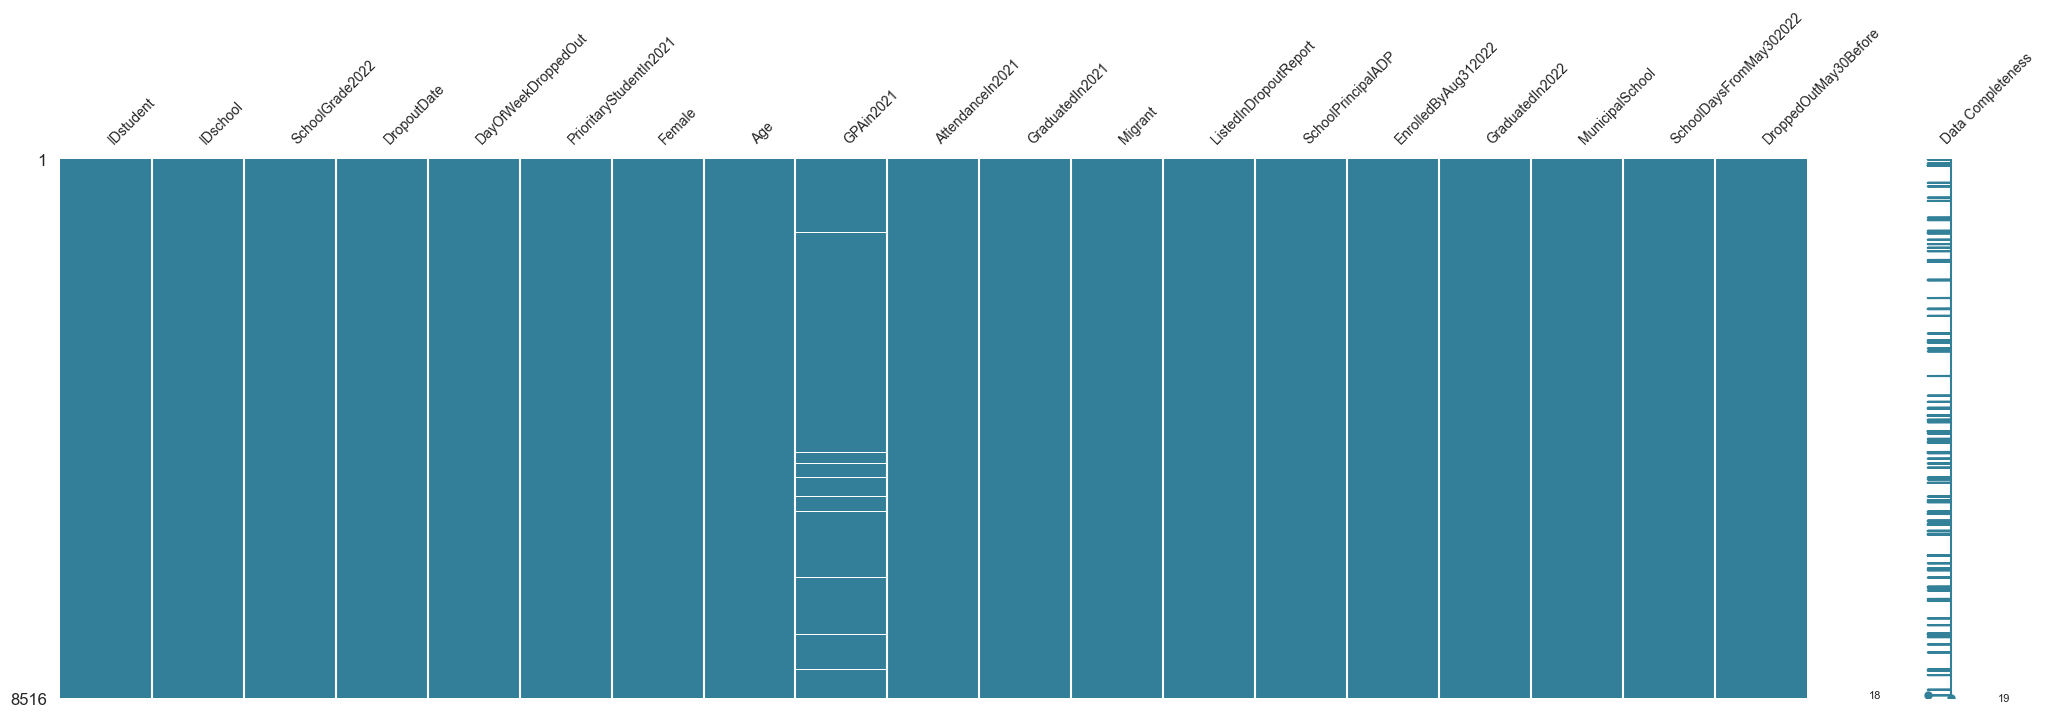

In [76]:
# Matriz de nulos

msno.matrix(df, figsize=(25, 7), fontsize=10, labels=True, color=(0.2, 0.5, 0.6));

## Análisis de nulos

Para probar si los valores faltantes son MCAR (missing completely at random), se realiza el test propuesto por Little (1988). Para esta prueba se usan todas las variables excepto DropoutDate, ya que su tipo de datos (datetime64 [ns]) no es compatible. Para ejecutar esta celda se debe instalar pyampute.

In [77]:
from pyampute.exploration.mcar_statistical_tests import MCARTest

data_mcar = df.copy()

data_mcar_filtered = data_mcar.drop('DropoutDate', axis=1)  # Excluye la columna 'DropoutDate'

mt = MCARTest(method="little")
print(mt.little_mcar_test(data_mcar_filtered)) 

0.0


>El resultado indica que se debe rechazar la hipotesis nula. Es decir, los valores faltantes no son MCAR (missing completely at random).

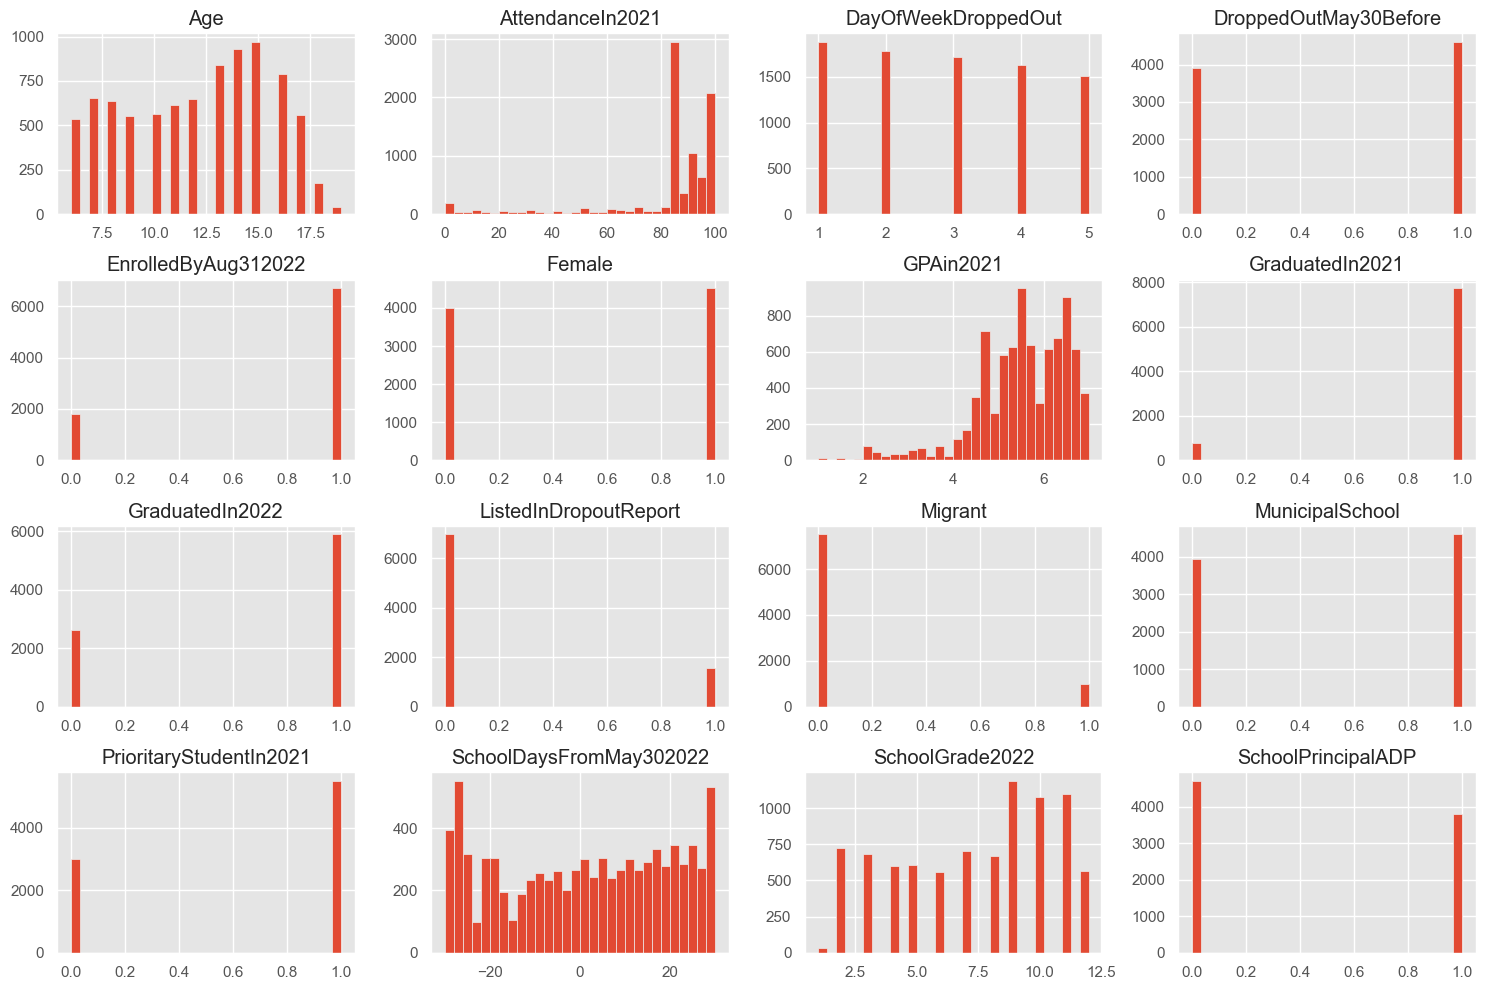

In [78]:
# Formato de imagen

plt.style.use('ggplot')


# Excluir columnas que sean IDs, por ejemplo 'IDstudent' o 'IDschool'
columns_to_exclude = ['IDstudent', 'IDschool']  # Ajusta esto a los nombres de tus columnas de IDs

# Seleccionar columnas numéricas incluyendo los tipos float32, int8, int16, etc.
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int64', 'int8', 'int16']).columns

# Excluir las columnas de IDs
numeric_columns = numeric_columns.difference(columns_to_exclude)

# Generar el histograma solo para las columnas numéricas relevantes
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
#plt.savefig('../figures/Histograma.png')
plt.show()

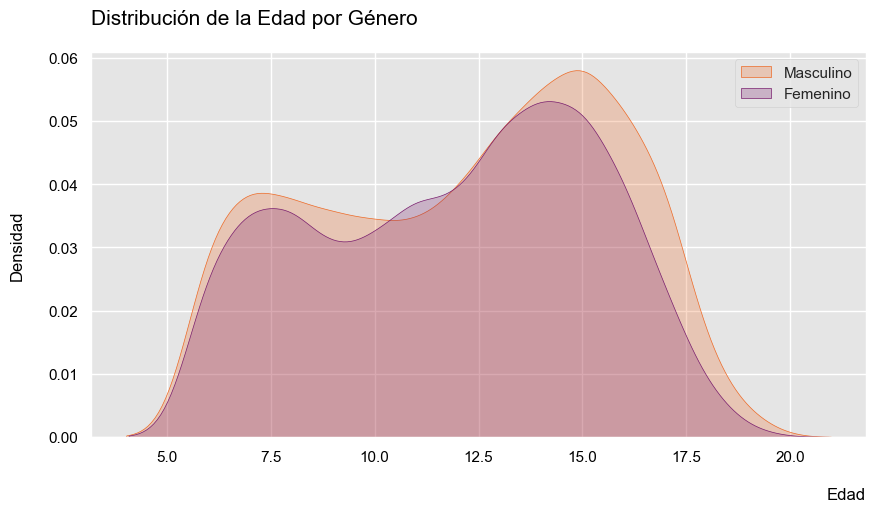

In [87]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='Age', hue='Female', fill=True, palette="inferno")
plt.title("Distribución de la Edad por Género", color='black',pad=20,loc='left', size= 15)
plt.xlabel("\nEdad", color='black', loc='right')
plt.xticks(color='black')
plt.ylabel("Densidad\n", color='black')
plt.yticks(color='black')
plt.legend(labels=["Masculino", "Femenino"])
plt.show()

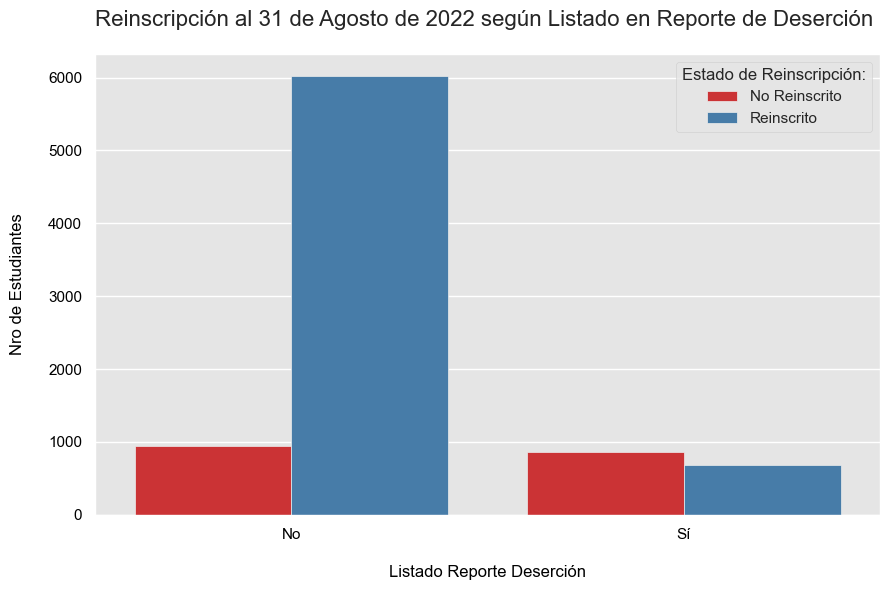

In [100]:
# Crear gráfico de barras para Enrollment by August 2022 en función de si fue listado en el reporte

plt.figure(figsize=(9,6))

sns.countplot(data=df, x='ListedInDropoutReport', hue='EnrolledByAug312022', palette="Set1")
plt.title("Reinscripción al 31 de Agosto de 2022 según Listado en Reporte de Deserción", loc='left', pad='20', size=16)
plt.xlabel("\nListado Reporte Deserción", color='black')
plt.ylabel("Nro de Estudiantes\n", color='black')
plt.yticks(color='black')
plt.legend(["No Reinscrito", "Reinscrito"], title="Estado de Reinscripción:")
plt.xticks([0, 1], ["No", "Sí"],color='black')
plt.tight_layout()

plt.savefig('../figures/Listed_dropeed.png')
plt.show()


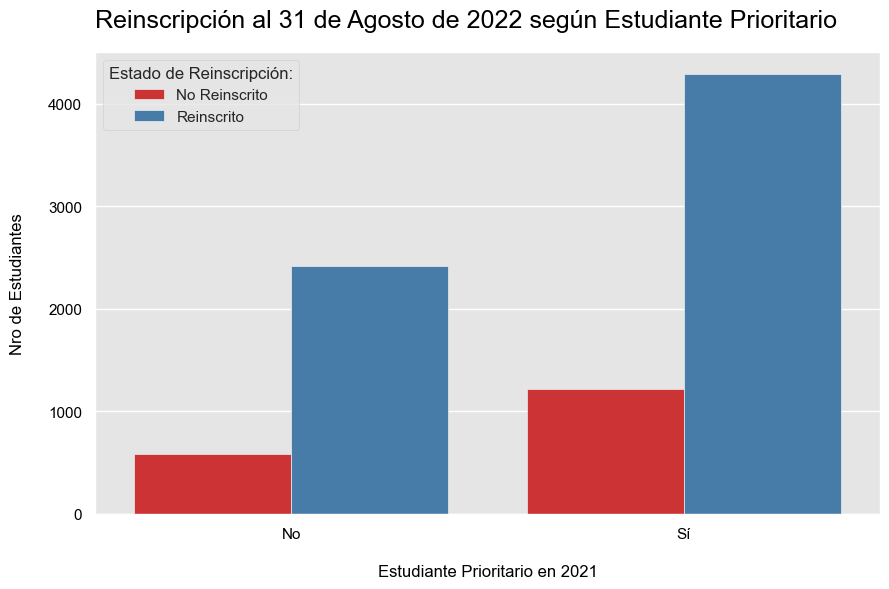

In [111]:
# Gráfico
plt.figure(figsize=(9,6))

# Crear gráfico de barras para EnrolledByAug312022 en función de PrioritaryStudentIn2021
sns.countplot(data=df, x='PrioritaryStudentIn2021', hue='EnrolledByAug312022', palette="Set1")

# Títulos y etiquetas
plt.title("Reinscripción al 31 de Agosto de 2022 según Estudiante Prioritario",color='black',loc='left', pad=18, size=18)
plt.xlabel("\nEstudiante Prioritario en 2021", color='black')
plt.yticks(color='black')
plt.ylabel("Nro de Estudiantes\n", color='black')
plt.legend(["No Reinscrito", "Reinscrito"], title="Estado de Reinscripción:")
plt.xticks([0, 1], ["No", "Sí"], color='black')  # Etiquetas para el eje x
plt.tight_layout()
plt.savefig('../figures/prioritary_dropeed.png')
plt.show()

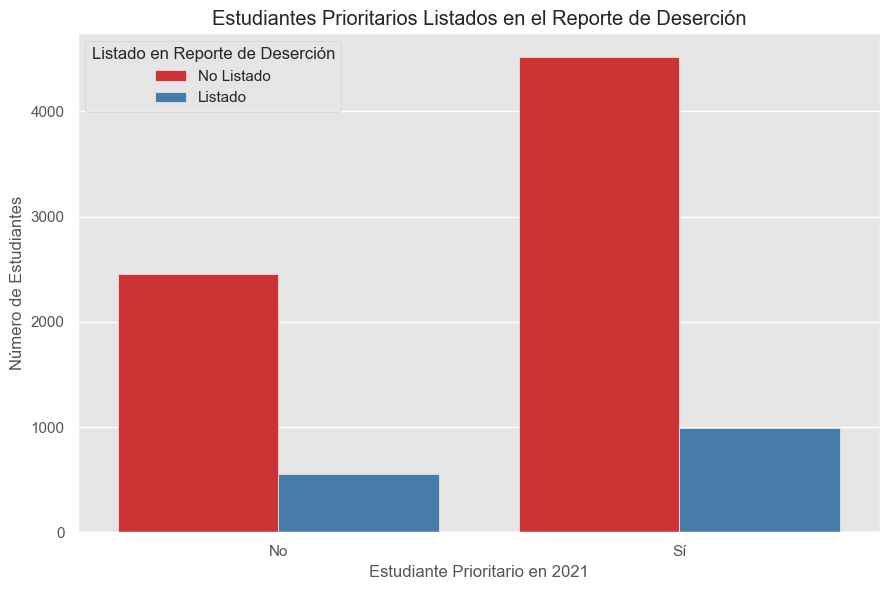

In [121]:
# Gráfico
plt.figure(figsize=(9,6))

# Crear gráfico de barras para PrioritaryStudentIn2021 en función de ListedInDropoutReport
sns.countplot(data=df, x='PrioritaryStudentIn2021', hue='ListedInDropoutReport', palette='Set1')

# Títulos y etiquetas
plt.title("Estudiantes Prioritarios Listados en el Reporte de Deserción")
plt.xlabel("Estudiante Prioritario en 2021")
plt.ylabel("Número de Estudiantes")
plt.legend(["No Listado", "Listado"], title="Listado en Reporte de Deserción")
plt.xticks([0, 1], ["No", "Sí"])  # Etiquetas para el eje x
plt.tight_layout()
plt.savefig('../figures/prioritary_listed.png')
plt.show()

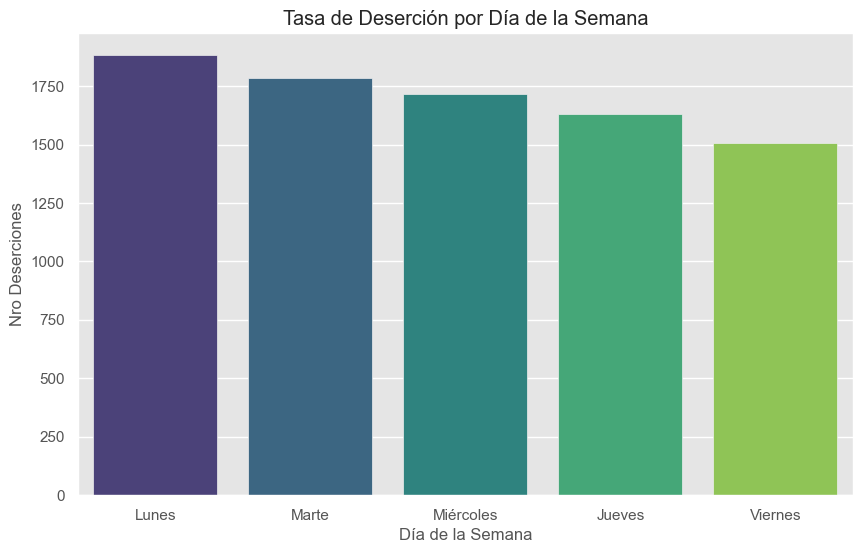

In [122]:
# Gráfico
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='DayOfWeekDroppedOut', palette="viridis")
plt.title("Tasa de Deserción por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Nro Deserciones")
plt.xticks(ticks=[0.0,1.0,2.0,3.0,4.0],labels=['Lunes','Marte','Miércoles','Jueves','Viernes'],rotation=0)
plt.show()

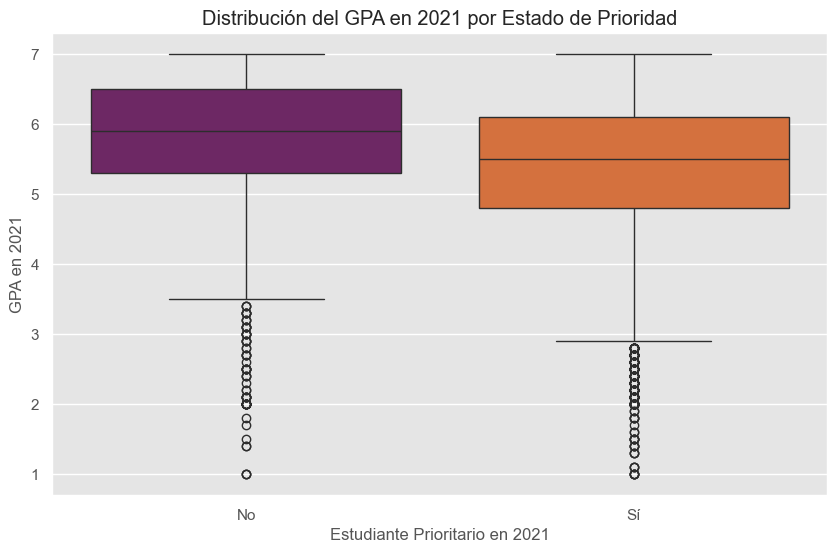

In [128]:
# Gráfico
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='PrioritaryStudentIn2021', y='GPAin2021', palette="inferno")
plt.title("Distribución del GPA en 2021 por Estado de Prioridad")
plt.xlabel("Estudiante Prioritario en 2021")
plt.ylabel("GPA en 2021")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

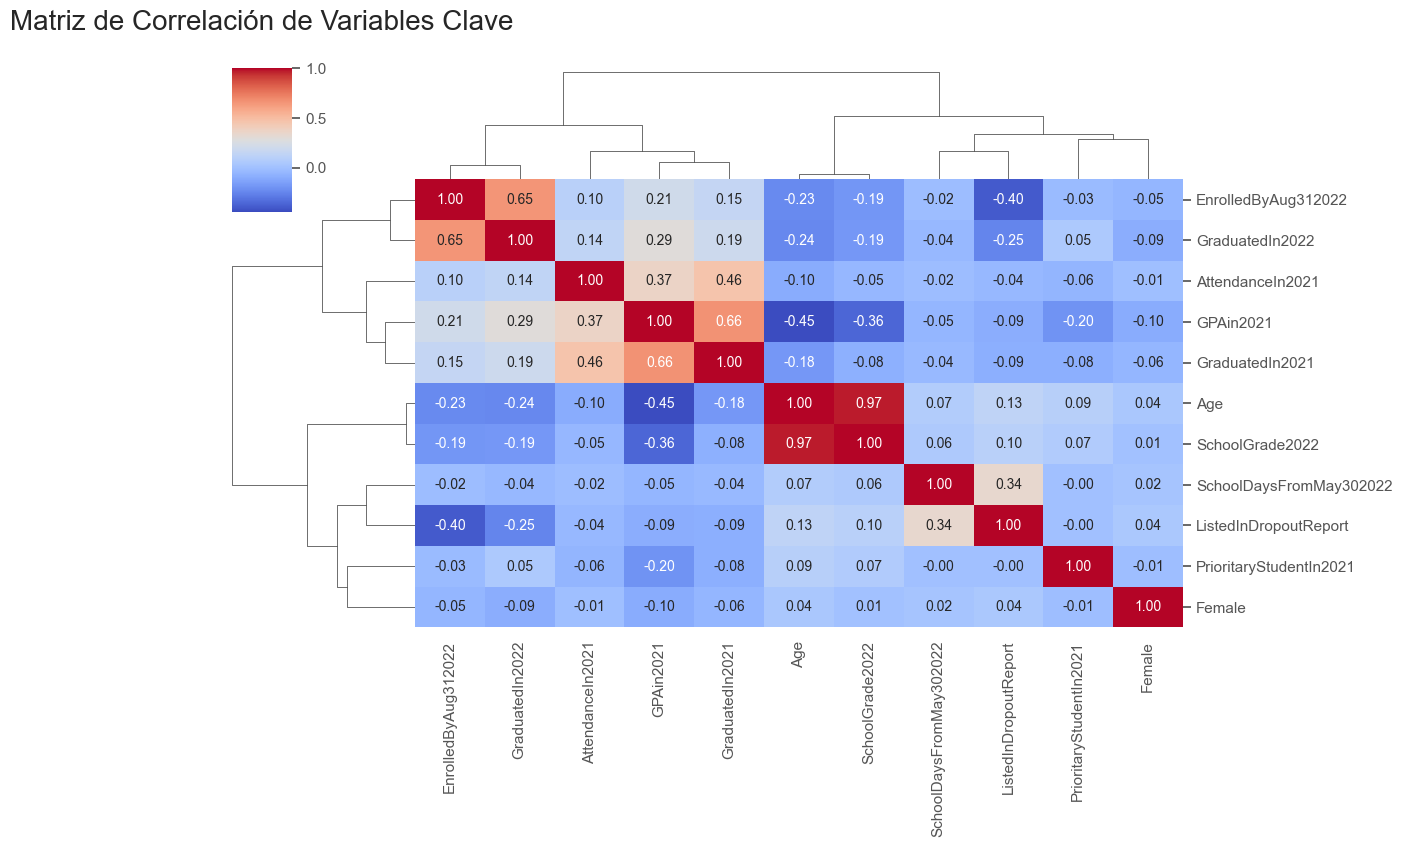

In [148]:
# Clustermap variables relevantes

correlation_matrix = df[['Age', 'GPAin2021', 'AttendanceIn2021', 'SchoolDaysFromMay302022', 'ListedInDropoutReport',
                         'EnrolledByAug312022','PrioritaryStudentIn2021','Female','SchoolGrade2022','GraduatedIn2021','GraduatedIn2022']].corr()
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", method='ward',figsize=(12,8))
plt.title("Matriz de Correlación de Variables Clave\n", loc='center',size=20)
#plt.tight_layout()
plt.savefig('../figures/correlation_matrix.png')
plt.show();


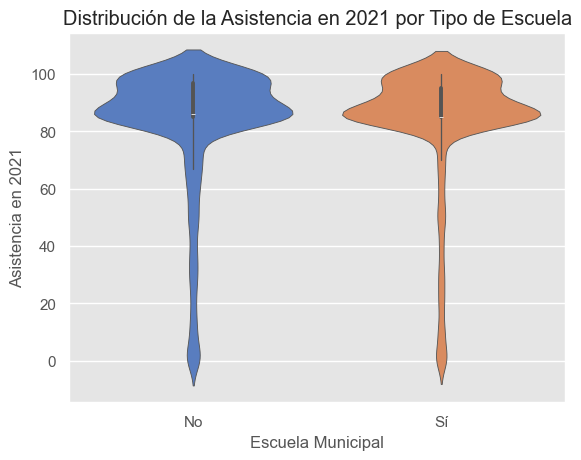

In [149]:
sns.violinplot(data=df, x='MunicipalSchool', y='AttendanceIn2021', palette="muted")
plt.title("Distribución de la Asistencia en 2021 por Tipo de Escuela")
plt.xlabel("Escuela Municipal")
plt.ylabel("Asistencia en 2021")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

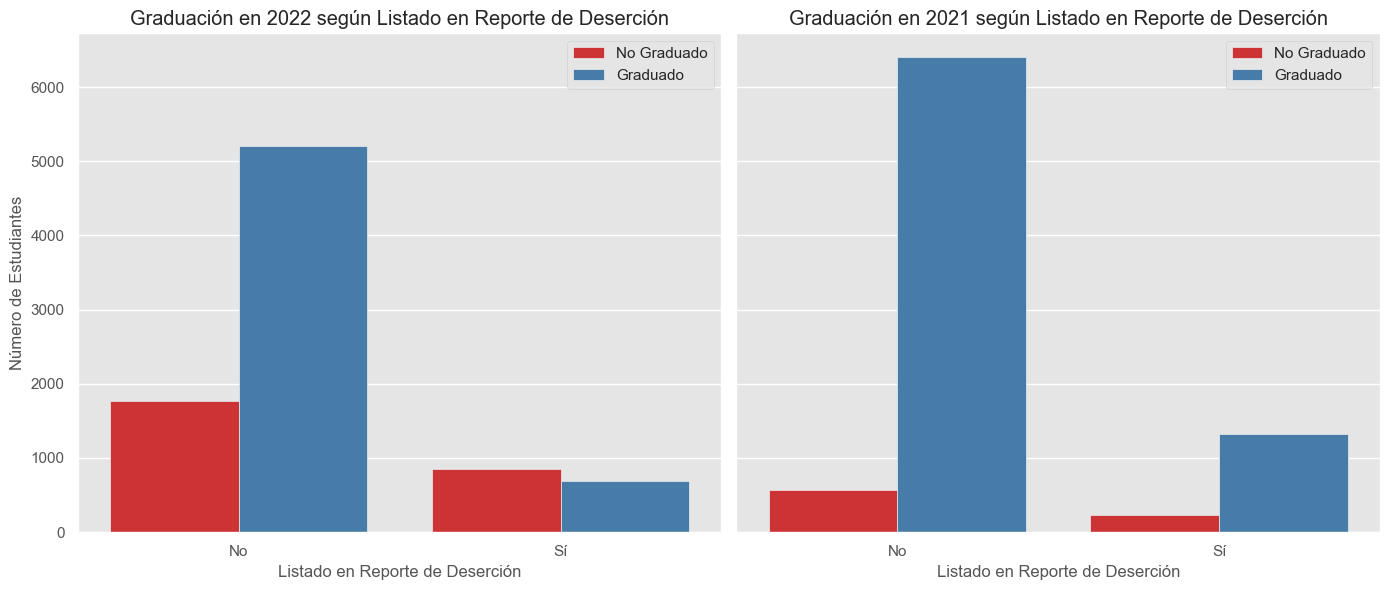

In [150]:
# Crear figura y subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para GraduatedIn2022
sns.countplot(data=df, x='ListedInDropoutReport', hue='GraduatedIn2022', palette="Set1", ax=axes[0])
axes[0].set_title("Graduación en 2022 según Listado en Reporte de Deserción")
axes[0].set_xlabel("Listado en Reporte de Deserción")
axes[0].set_ylabel("Número de Estudiantes")
axes[0].legend(["No Graduado", "Graduado"])
axes[0].set_xticklabels(["No", "Sí"])

# Gráfico para GraduatedIn2021
sns.countplot(data=df, x='ListedInDropoutReport', hue='GraduatedIn2021', palette="Set1", ax=axes[1])
axes[1].set_title("Graduación en 2021 según Listado en Reporte de Deserción")
axes[1].set_xlabel("Listado en Reporte de Deserción")
axes[1].set_ylabel("")
axes[1].legend(["No Graduado", "Graduado"])
axes[1].set_xticklabels(["No", "Sí"])

# Ajustar diseño
plt.tight_layout()
plt.savefig('../figures/Graduaciones_listed.png')
plt.show()

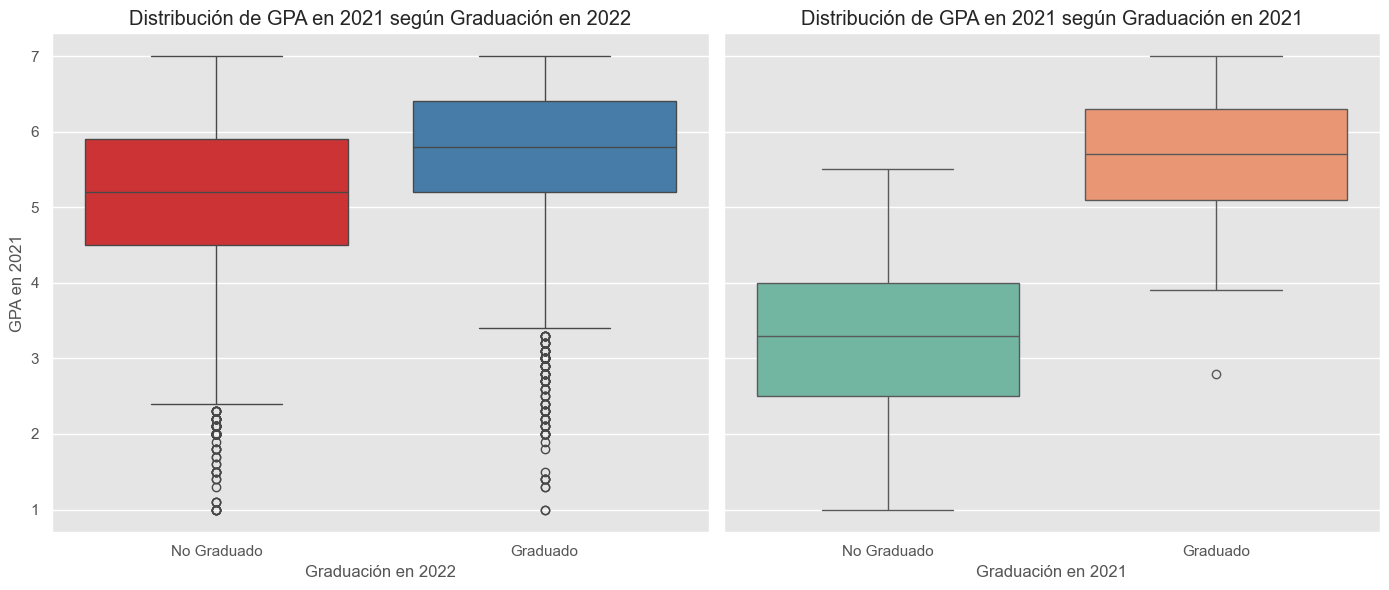

In [151]:
# Crear figura y subplots para la graduación en 2021 y 2022
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot de GPA en 2022 según estado de graduación
sns.boxplot(data=df, x='GraduatedIn2022', y='GPAin2021', palette="Set1", ax=axes[0])
axes[0].set_title("Distribución de GPA en 2021 según Graduación en 2022")
axes[0].set_xlabel("Graduación en 2022")
axes[0].set_ylabel("GPA en 2021")
axes[0].set_xticklabels(["No Graduado", "Graduado"])

# Boxplot de GPA en 2021 según estado de graduación
sns.boxplot(data=df, x='GraduatedIn2021', y='GPAin2021', palette="Set2", ax=axes[1])
axes[1].set_title("Distribución de GPA en 2021 según Graduación en 2021")
axes[1].set_xlabel("Graduación en 2021")
axes[1].set_ylabel("")
axes[1].set_xticklabels(["No Graduado", "Graduado"])

# Ajustar diseño
plt.tight_layout()
plt.show()


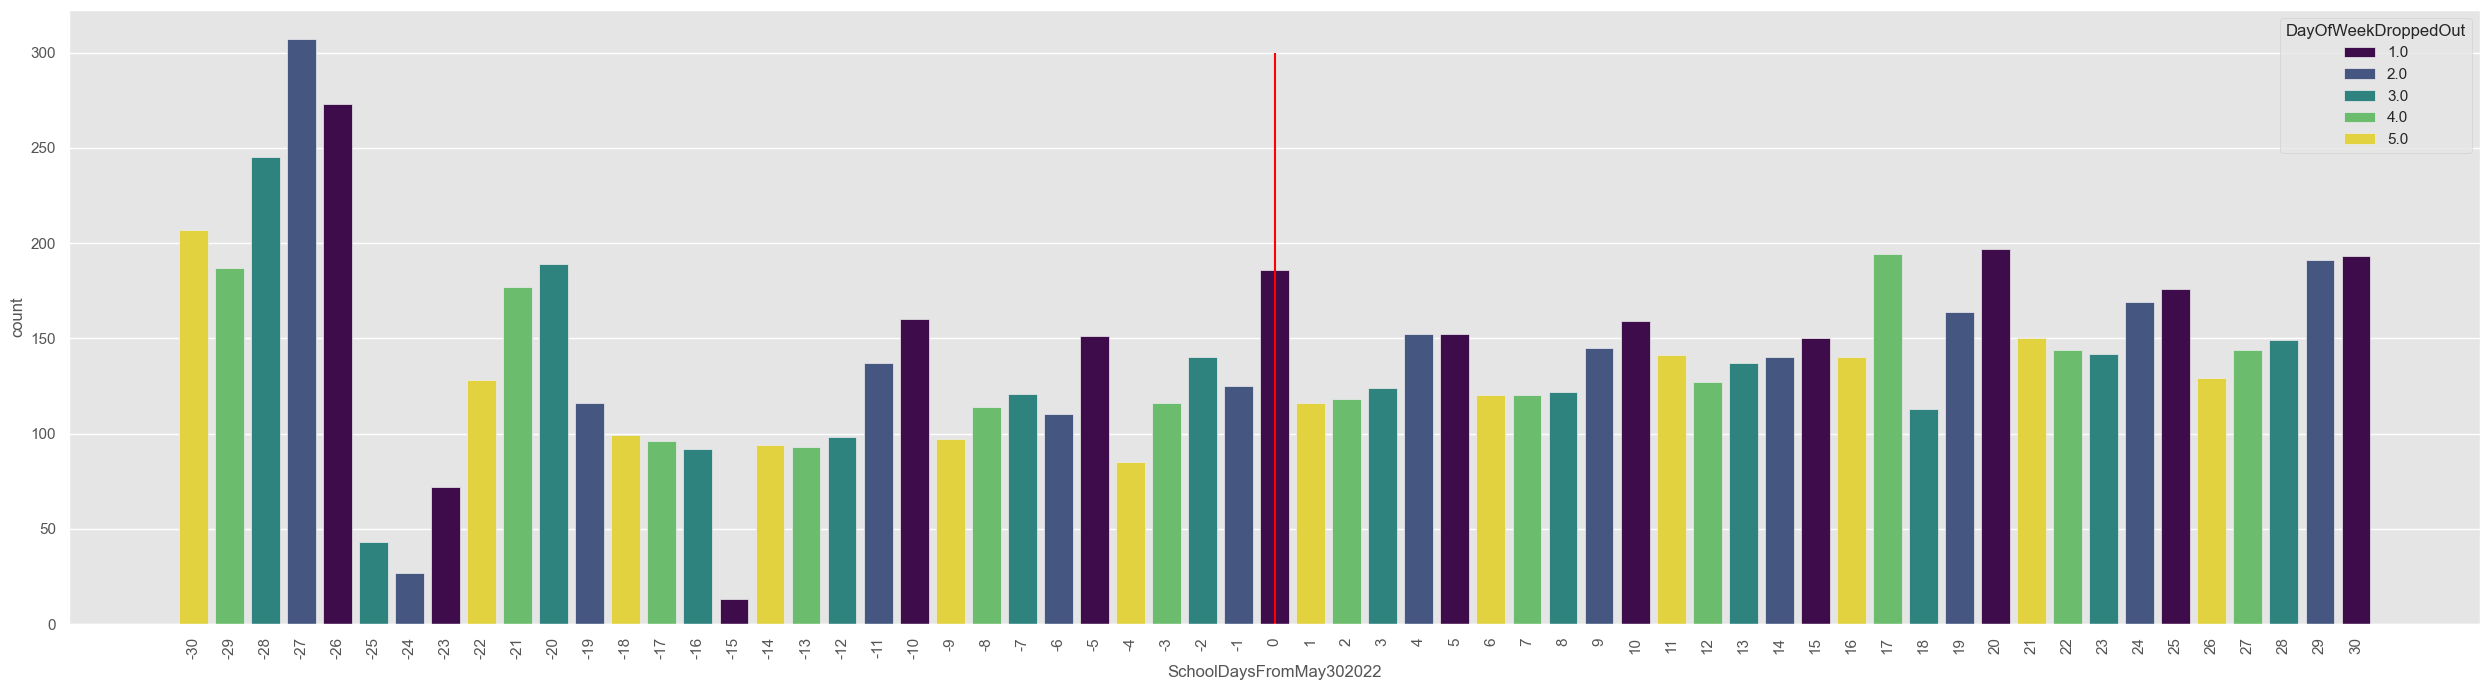

In [152]:
# Grafico Fecha de abandono

plt.figure(figsize=(25,7))
sns.countplot(data=df, x='SchoolDaysFromMay302022',order=df['SchoolDaysFromMay302022'].sort_values().unique(), hue='DayOfWeekDroppedOut', palette='viridis')
plt.xticks(rotation=90)
plt.vlines(x=30, ymin=0, ymax=300, color='red', linestyle='-')
plt.tight_layout()
plt.savefig('../figures/SchoolDaysFromMay302020.png')

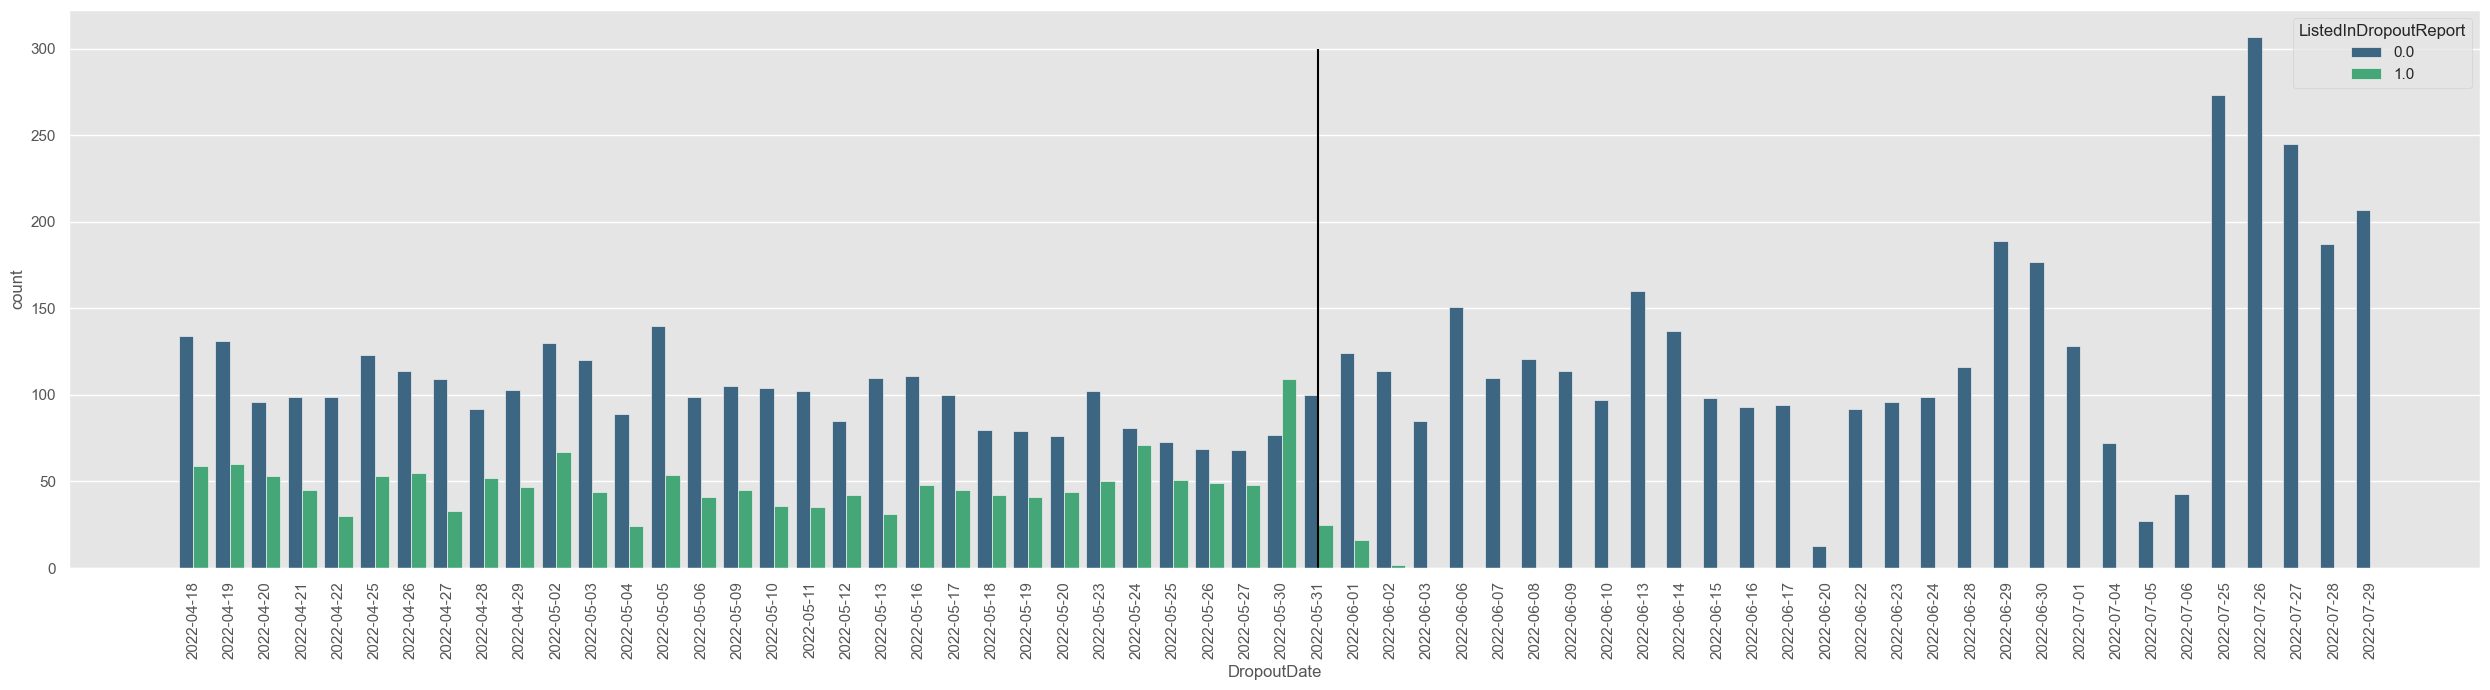

In [153]:
plt.figure(figsize=(25,7))
sns.countplot(data=df, x='DropoutDate',order=df['DropoutDate'].sort_values().unique(), hue='ListedInDropoutReport', palette='viridis')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=300, color='black', linestyle='-')
plt.tight_layout()
plt.savefig('../figures/ListedInDropoutReport.png')
plt.show()

## Análisis de componentes principales PCA

In [154]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA

In [155]:
df['GPAin2021'].fillna(df['GPAin2021'].mean(), inplace=True)
df.isnull().sum()

IDstudent                  0
IDschool                   0
SchoolGrade2022            0
DropoutDate                0
DayOfWeekDroppedOut        0
PrioritaryStudentIn2021    0
Female                     0
Age                        0
GPAin2021                  0
AttendanceIn2021           0
GraduatedIn2021            0
Migrant                    0
ListedInDropoutReport      0
SchoolPrincipalADP         0
EnrolledByAug312022        0
GraduatedIn2022            0
MunicipalSchool            0
SchoolDaysFromMay302022    0
DroppedOutMay30Before      0
dtype: int64

In [156]:
# Escalado de datos
scaler = MinMaxScaler()
df1 = df.copy()
df1['DayOfWeekDroppedOut'] = df['DayOfWeekDroppedOut'].astype('category')
# Crear dummies para la columna 'DayOfWeekDroppedOut' sin eliminar ninguna categoría
df1_dummies = pd.get_dummies(df1['DayOfWeekDroppedOut'], prefix='DayOfWeek', drop_first=False)

# Combinar las dummies con el DataFrame original
df1 = pd.concat([df1, df1_dummies], axis=1)

# Eliminar la columna original si ya no es necesaria
df1.drop('DayOfWeekDroppedOut', axis=1, inplace=True)

# Eliminar columnas de tipo datetime64
df1_numeric = df1.select_dtypes(exclude=['datetime64'])

# Luego puedes proceder con el escalado y el PCA
df1_scaled = scaler.fit_transform(df1_numeric)
df1_scaled

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.17439812e-04, 0.00000000e+00, 7.27272727e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.34879624e-04, 0.00000000e+00, 8.18181818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99765120e-01, 9.98977651e-01, 1.81818182e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99882560e-01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 7.27272727e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [157]:
# Análisis PCA para conservar el 90% de la varianza
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(df1_scaled)
pca_result = pd.DataFrame(pca_result, columns=[f'PC_{i+1}' for i in range(pca_result.shape[1])])
pca_result

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,1.044163,-0.172175,-1.091257,-0.090069,-0.802780,0.165542,0.103126,0.158339,0.941032,0.737061,-0.146799,-0.108764,-0.833264
1,1.135009,0.710958,-0.124611,-0.437322,0.267209,-0.124508,0.275895,0.094091,0.941281,0.452454,-0.027334,-0.158215,-1.076732
2,1.184591,0.502131,-0.315351,0.382660,0.346681,-0.012213,0.652115,-0.614896,-0.164024,-0.015888,-0.099903,-0.529892,0.328515
3,1.355588,1.026299,-0.081376,0.258731,0.264195,0.662446,-0.397605,-0.131563,-0.087586,-0.122339,0.531879,-0.356219,0.112968
4,0.983028,-0.214859,-1.180427,-0.359562,0.177566,0.155667,0.559008,-0.642781,-0.102243,0.468780,0.401244,-0.288415,0.159081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,-0.309102,0.090791,0.954469,0.140676,-0.287045,0.643558,-0.367185,-0.044758,-0.138166,-0.685636,-0.411593,0.556749,0.218861
8512,-0.789810,0.470746,0.445996,0.228125,0.631554,0.605455,-0.442635,-0.053089,-0.081885,-0.007020,-0.286725,0.574576,0.395018
8513,-1.083424,-0.462106,0.069630,0.275751,-0.330716,0.818269,-0.591752,-0.001701,-0.157196,-0.596483,-0.120443,0.599478,0.114475
8514,-0.675812,-0.042528,-0.754744,0.592657,-0.528844,0.129668,0.025569,0.251561,0.872708,0.181849,-0.438056,0.517506,0.568687


In [158]:
# Ajustar PCA sin reducción de dimensiones para calcular la varianza explicada
pca_full = PCA()
pca_full.fit(df1_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

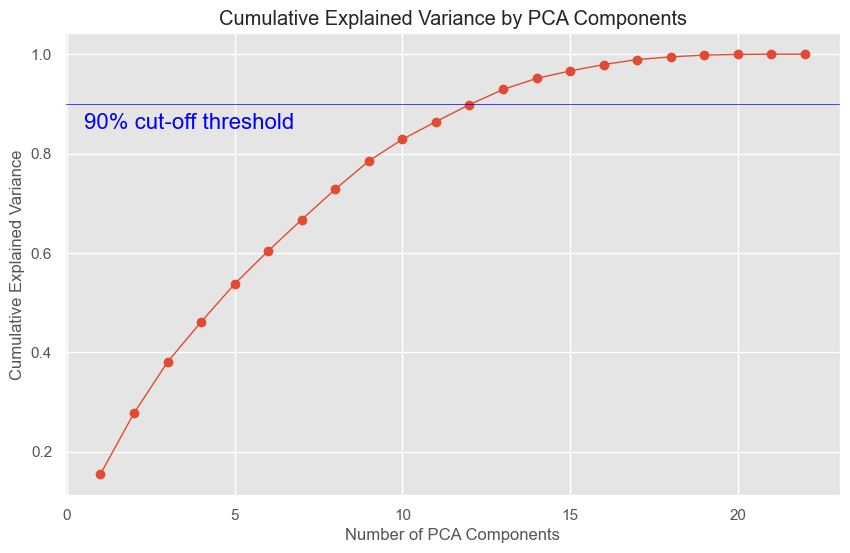

In [159]:
# Graficar la varianza explicada acumulada

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', linewidth=1)
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='blue', linestyle='-', linewidth=0.5)  # Línea de corte de 90% de varianza
plt.text(0.5, 0.85, '90% cut-off threshold', color='blue', fontsize=16)
plt.savefig('../figures/CumulativeExplainedVariance.png')

> Numero optimo de componentes es 10

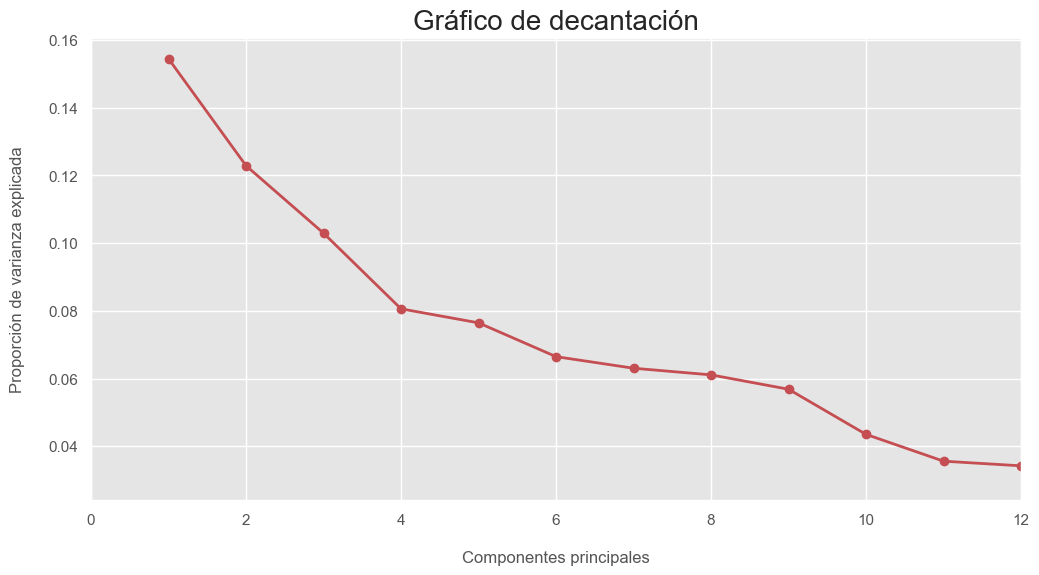

In [160]:
# Gráfico de decantación de PCA
plt.figure(figsize=(12, 6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Gráfico de decantación', fontsize=20)
plt.xlabel('\nComponentes principales', fontsize=12)
plt.xlim(0, 12)
plt.ylabel('Proporción de varianza explicada\n', fontsize=12)
plt.savefig('../figures/decantacion.png')
plt.show()

In [161]:
# Proporción de la varianza explicada
print("Proporción de la varianza explicada:", pca.explained_variance_ratio_)  
out_sum = np.cumsum(pca.explained_variance_ratio_)
print("\nVarianza explicada acumulada:", out_sum)

Proporción de la varianza explicada: [0.15445409 0.12287904 0.10296271 0.08062201 0.07648266 0.06650308
 0.06308307 0.06112417 0.05688177 0.04355556 0.03563809 0.03426785
 0.03044881]

Varianza explicada acumulada: [0.15445409 0.27733313 0.38029584 0.46091785 0.53740051 0.6039036
 0.66698667 0.72811083 0.78499261 0.82854817 0.86418626 0.89845411
 0.92890292]


In [162]:
# Cargar los coeficientes de los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df1.columns[1:])
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
IDschool,-0.140979,0.068693,-0.041016,-0.004783,0.018981,0.003060,0.019399,0.015462,0.008527,-0.144963,-0.193747,0.731329,0.191168
SchoolGrade2022,-0.097190,0.043137,-0.023664,-0.002069,0.013800,0.004604,0.011334,0.012909,0.010514,-0.100638,-0.133565,0.519995,0.135143
DropoutDate,0.075952,0.090027,-0.098018,0.145559,-0.030075,0.009857,0.038447,-0.004258,0.039775,0.643058,0.079310,0.085904,0.232819
PrioritaryStudentIn2021,0.081179,-0.054128,0.101746,0.865384,0.135698,0.008389,-0.100747,0.046480,-0.056227,-0.247448,-0.176523,-0.117238,0.160022
Female,0.073258,0.112745,-0.177857,-0.135500,0.957176,-0.068508,-0.072572,-0.031469,0.024613,0.001345,0.042508,-0.020977,0.023382
Age,0.088417,0.098898,-0.106645,0.151240,-0.014781,0.008935,0.031415,-0.003621,0.036576,0.587684,0.042447,0.084986,0.150306
GPAin2021,-0.056303,-0.052953,0.067881,-0.102081,-0.021282,-0.001997,0.002830,0.000693,-0.003525,-0.157389,0.150568,-0.048149,0.207527
AttendanceIn2021,-0.015711,-0.041996,0.053792,-0.058418,0.004183,-0.004810,0.014790,-0.007619,0.013448,-0.061452,0.212412,-0.099381,0.382075
GraduatedIn2021,-0.064143,-0.073079,0.090946,-0.106317,-0.018316,-0.003311,0.008719,-0.005169,-0.003132,-0.147498,0.327948,-0.108730,0.718225
Migrant,0.067164,0.012316,-0.109392,-0.349611,-0.078125,0.002822,0.009012,-0.025343,-0.025499,-0.069449,-0.371301,-0.174602,0.138784


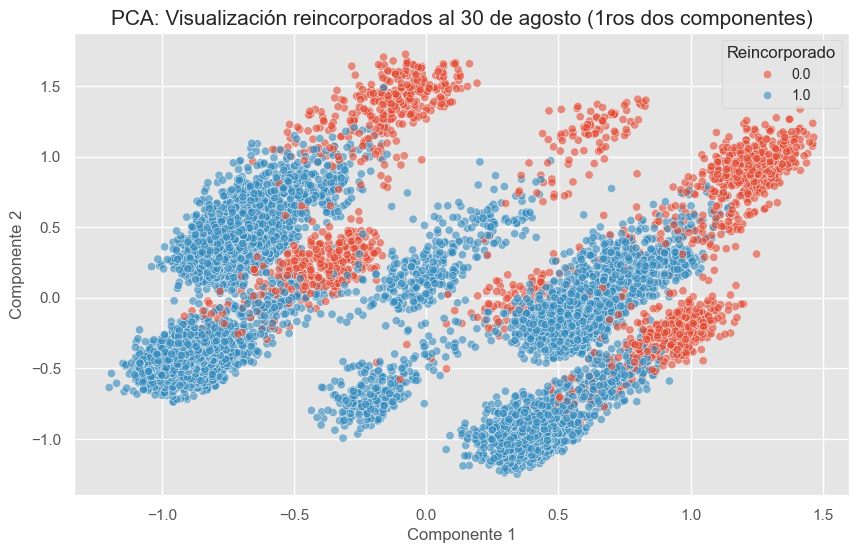

In [163]:
# Aplicar PCA con el número óptimo de componentes (7 en este caso)
pca1 = PCA(n_components=7)
pca_result1 = pca1.fit_transform(df1_scaled)
pca_result1 = pd.DataFrame(pca_result1, columns=[f'PC_{i+1}' for i in range(pca_result1.shape[1])])

# Visualización de los primeros dos componentes principales
para_visualizar = pd.concat([pca_result1, df['EnrolledByAug312022']], axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=para_visualizar, x='PC_1', y='PC_2', hue='EnrolledByAug312022', alpha=0.6)
plt.title('PCA: Visualización reincorporados al 30 de agosto (1ros dos componentes)', fontsize=15)
plt.xlabel('Componente 1', fontsize=12)
plt.ylabel('Componente 2', fontsize=12)
plt.legend(title='Reincorporado', fontsize=10, loc='upper right')
plt.savefig('../figures/PCAVisualizar.png')
plt.show()

In [164]:
# Cargar los coeficientes de los 7 primeros componentes
loadings2 = pd.DataFrame(pca1.components_.T, columns=[f'PC{i+1}' for i in range(7)], index=df1.columns[1:])
loadings2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
IDschool,-0.140979,0.068693,-0.041016,-0.004783,0.018981,0.003060,0.019399
SchoolGrade2022,-0.097190,0.043137,-0.023664,-0.002069,0.013800,0.004604,0.011334
DropoutDate,0.075952,0.090027,-0.098018,0.145559,-0.030075,0.009857,0.038447
PrioritaryStudentIn2021,0.081179,-0.054128,0.101746,0.865384,0.135698,0.008389,-0.100747
Female,0.073258,0.112745,-0.177857,-0.135500,0.957176,-0.068508,-0.072572
Age,0.088417,0.098898,-0.106645,0.151240,-0.014781,0.008935,0.031415
GPAin2021,-0.056303,-0.052953,0.067881,-0.102081,-0.021282,-0.001997,0.002830
AttendanceIn2021,-0.015711,-0.041996,0.053792,-0.058418,0.004183,-0.004810,0.014790
GraduatedIn2021,-0.064143,-0.073079,0.090946,-0.106317,-0.018316,-0.003311,0.008719
Migrant,0.067164,0.012316,-0.109392,-0.349611,-0.078125,0.002822,0.009012


In [165]:
# Ordenar los coeficientes de cada componente principal
[loadings2[i].sort_values(ascending=False) for i in loadings2.columns]

[MunicipalSchool            0.631709
 SchoolPrincipalADP         0.616076
 ListedInDropoutReport      0.130448
 DroppedOutMay30Before      0.111245
 Age                        0.088417
 PrioritaryStudentIn2021    0.081179
 DropoutDate                0.075952
 Female                     0.073258
 Migrant                    0.067164
 SchoolDaysFromMay302022    0.066363
 DayOfWeek_1.0              0.018748
 DayOfWeek_4.0              0.014545
 DayOfWeek_2.0              0.011453
 DayOfWeek_5.0             -0.005313
 AttendanceIn2021          -0.015711
 DayOfWeek_3.0             -0.039432
 GPAin2021                 -0.056303
 GraduatedIn2021           -0.064143
 SchoolGrade2022           -0.097190
 IDschool                  -0.140979
 EnrolledByAug312022       -0.205929
 GraduatedIn2022           -0.275695
 Name: PC1, dtype: float64,
 DroppedOutMay30Before      0.580390
 ListedInDropoutReport      0.398774
 SchoolDaysFromMay302022    0.341320
 Female                     0.112745
 DayOfWeek

## Clustering descriptivo y análisis de correspondencias

In [166]:
# Para el clustering descriptivo se utilizará un dataset preprocesado con variables "limpias" (casestudy_dropout_clean.csv). 
# Importación dataset de trabajo para realizar el clustering descriptivo

dfc = pd.read_csv('../data/casestudy_dropout_clean.csv')
dfc.head()

,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,MunicipalSchool,DroppedOutMay30Before,niv_rend,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,anticipacion_abandono,asistencia_2021
0,5,0,0,18,0,0,0,1,0,1,0,Menor 4.0,Secundaria,4. 3ro-4to medio,Después_31_mayo,75,Menos del 85%
1,5,0,1,15,0,0,1,1,1,1,1,Menor 4.0,Secundaria,3. 1ro-2do medio,Antes_31_mayo,110,Menos del 85%
2,3,1,1,14,1,0,0,1,0,1,1,4.0 - 4.9,Secundaria,3. 1ro-2do medio,Antes_31_mayo,133,85% y más
3,1,1,1,14,1,0,1,1,0,1,1,5.0 - 5.9,Secundaria,3. 1ro-2do medio,Antes_31_mayo,121,85% y más
4,3,0,1,17,1,0,0,1,0,1,0,4.0 - 4.9,Secundaria,4. 3ro-4to medio,Después_31_mayo,77,85% y más


In [167]:
# Con pd.get_dummies() se convierten las variables nivel_enseñanza2 y niv_rend en variables dummies

dfc = pd.get_dummies(dfc, columns=['nivel_enseñanza2', 'niv_rend','DayOfWeekDroppedOut'], dtype=int)
dfc.drop(columns=['nivel_enseñanza'], inplace=True)


# Separar vector objetivo del dataset

y = dfc['EnrolledByAug312022']
dfc.drop(columns=['EnrolledByAug312022', 'DroppedOutMay30Before'],inplace=True)


# Label encoder para las variables nivel_enseñanza, periodo_abandono, asistencia_2021

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#dfc['nivel_enseñanza'] = le.fit_transform(dfc['nivel_enseñanza'])
dfc['periodo_abandono'] = le.fit_transform(dfc['periodo_abandono'])
dfc['asistencia_2021'] = le.fit_transform(dfc['asistencia_2021'])


# Escalamiento de las variables con MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(dfc), columns=dfc.columns)

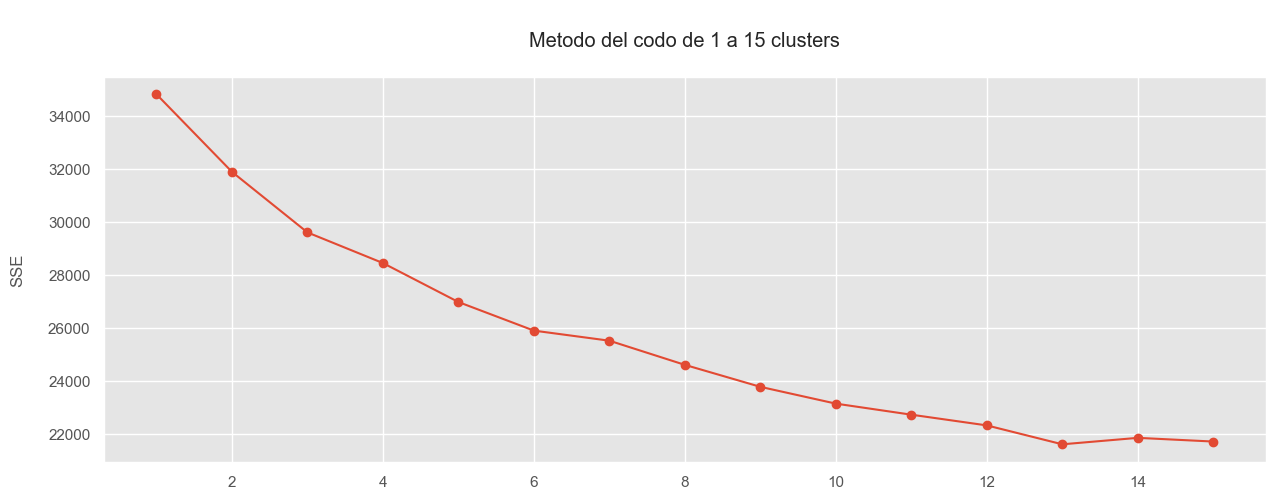

In [168]:
# Método del codo con inertia
from sklearn.cluster import KMeans

plt.figure(figsize=(15, 5))

sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k,random_state=20).fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("\nMetodo del codo de 1 a 15 clusters\n")
plt.ylabel("SSE\n")
plt.show()

In [169]:
kmeans = KMeans(n_clusters=6, random_state=20).fit(df_scaled)
dfc['cluster_kmeans'] = kmeans.labels_ # Se agrega el cluster perteneciente como feature
dfc['cluster_kmeans'].value_counts()

cluster_kmeans
2    2029
4    1645
1    1345
0    1299
3    1198
5    1000
Name: count, dtype: int64

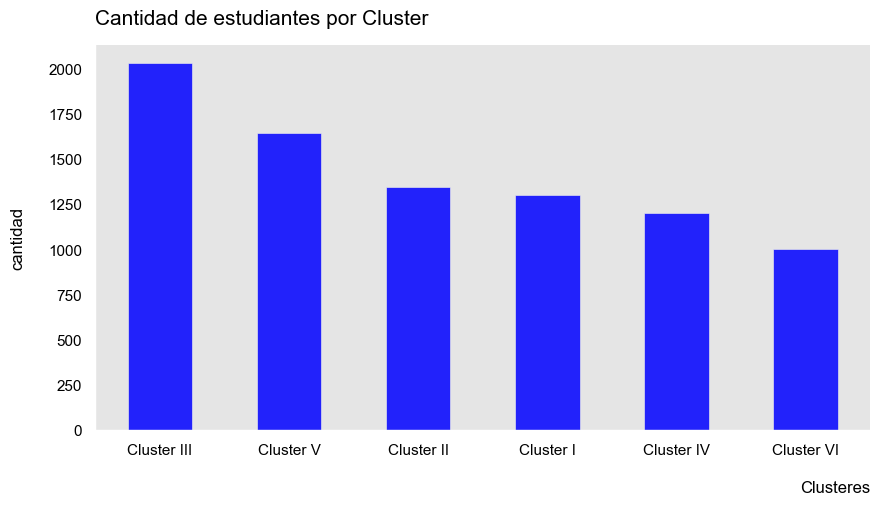

In [170]:
dfc['cluster_kmeans'].value_counts().plot(kind='bar',figsize=(10, 5), color='blue', alpha=0.85)
plt.xticks(rotation=0);
plt.title('Cantidad de estudiantes por Cluster', color='black', fontsize=15, loc='left', pad=15)
plt.xlabel('\nClusteres', color='black', loc='right')
plt.xticks(np.arange(6), ['Cluster III', 'Cluster V', 'Cluster II', 'Cluster I', 'Cluster IV', 'Cluster VI'], color='black')
plt.ylabel('cantidad\n', color='black')
plt.yticks(color='black')
plt.grid(False)
sns.despine()
plt.show()

### Tabla descriptiva clustering

In [171]:
tabla_clusters = dfc.groupby('cluster_kmeans').agg(['mean']).T.round(3)
tabla_clusters = pd.DataFrame(tabla_clusters)
tabla_clusters.columns =['I', 'II', 'III', 'IV', 'V','VI']
tabla_clusters

,,I,II,III,IV,V,VI
PrioritaryStudentIn2021,mean,0.717,0.649,0.673,0.745,0.488,0.643
Female,mean,0.566,0.525,0.550,0.552,0.464,0.538
Age,mean,15.329,11.195,12.835,15.193,9.809,7.307
GraduatedIn2021,mean,0.846,0.941,0.887,0.834,0.994,0.927
Migrant,mean,0.084,0.187,0.078,0.103,0.087,0.212
ListedInDropoutReport,mean,0.416,0.125,0.205,0.007,0.164,0.146
SchoolPrincipalADP,mean,0.801,0.870,0.000,0.625,0.000,0.841
MunicipalSchool,mean,1.000,1.000,0.000,0.789,0.001,1.000
periodo_abandono,mean,0.002,0.475,0.384,1.000,0.488,0.490
anticipacion_abandono,mean,115.327,90.458,95.667,65.086,89.568,88.415


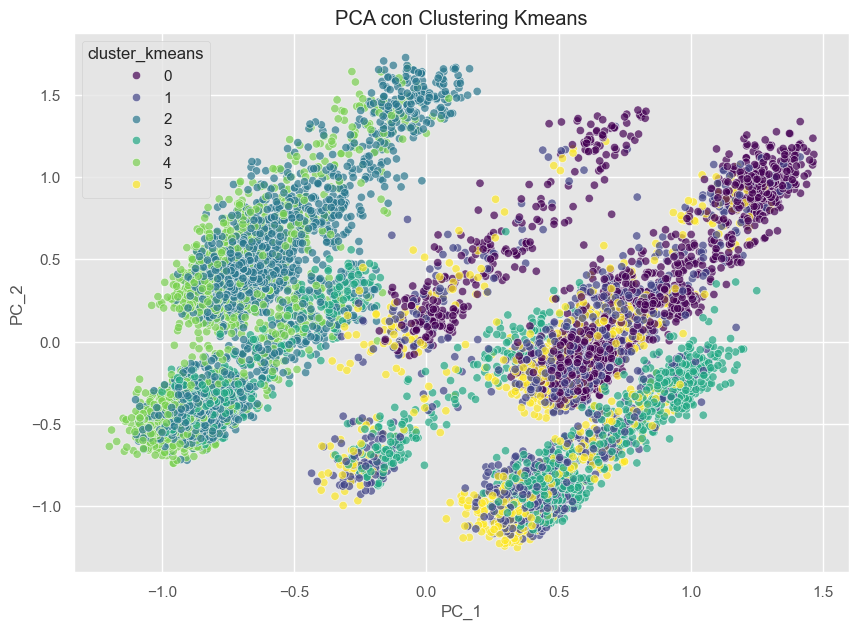

In [172]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=pca_result, x='PC_1', y='PC_2', hue=dfc['cluster_kmeans'], palette='viridis', alpha=0.7)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('PCA con Clustering Kmeans')
plt.show()

### Análisis de correspondencias

In [173]:
# Para el análisis de correspondecias se utilizará un dataset que contiene variables categóricas expresadas en string (cadenas de caracteres). La idea es usar las etiquetas
# de las variables categóricas para realizar el análisis de correspondencias múltiples y luego mapearlas.

df_cat = pd.read_csv('../data/dfcat.csv')

In [174]:
df_cat.head(3)

,curso_2022,día_sem,est_priorit,sexo,graduado_2021,est_migrante,reportado,dir_ADP,reincorp_30ago,graduado_2022,esc_municipal,deserción_antes30may
0,4° med,Viernes,No,Hombre,No,No,No,Sí,No,No,Sí,No
1,1° med,Viernes,No,Mujer,No,No,Sí,Sí,Sí,No,Sí,Sí
2,2° med,Miércoles,Sí,Mujer,Sí,No,No,Sí,No,No,Sí,Sí


In [175]:
# Análisis de correspondencias de variables categóricas con prince

import prince

# Instanciar el objeto MCA y entrenar

ca = prince.MCA(n_components=2)
ca = ca.fit(df_cat)

# Coordenadas de las filas y columnas

row_coords = ca.row_coordinates(df_cat)
col_coords = ca.column_coordinates(df_cat)

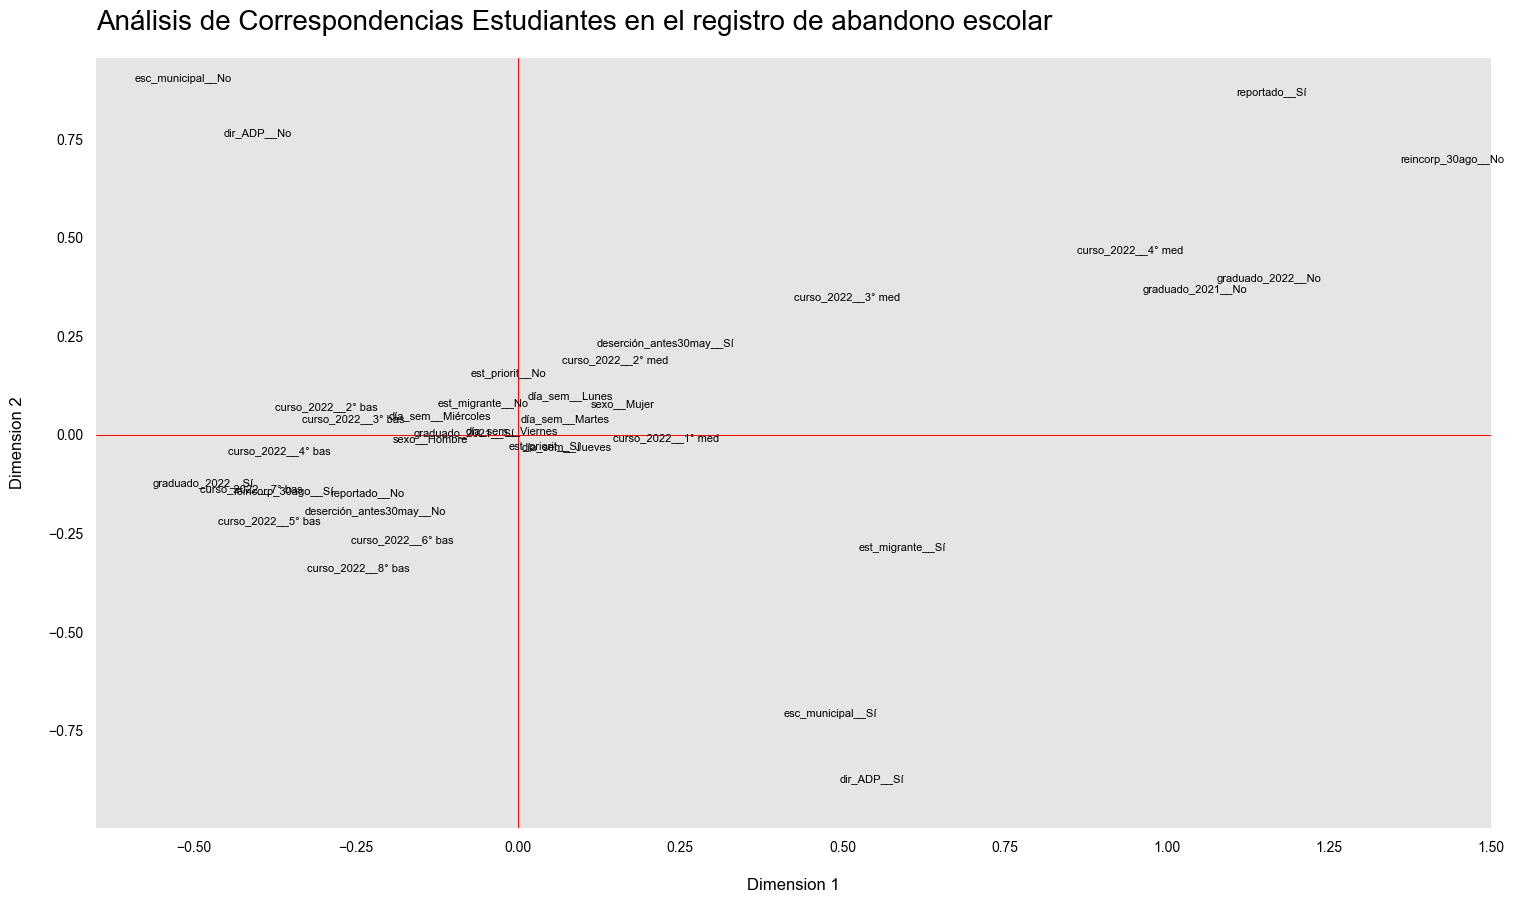

In [179]:
# Graficación de las coordenadas de las columnas para visualizar agrupación de las etiquetas de las variables categoricas

fig, ax = plt.subplots(figsize=(18, 10))

ax.scatter(col_coords[0], col_coords[1], color='red', label='Attributes', s=0.00001)
for i, txt in enumerate(col_coords.index):
    ax.annotate(txt, (col_coords[0][i], 
                      col_coords[1][i]), 
                      color='black', 
                      fontsize=8, 
                      ha='center', 
                      va='center',
                      textcoords='offset points',
                      #arrowprops=dict(arrowstyle="->", color="gray", lw=0.5),
                      xytext=(10,10))#, rotation=0, xytext=(0, 0), textcoords='offset points')

ax.set_title('Análisis de Correspondencias Estudiantes en el registro de abandono escolar', fontsize=20, loc='left',pad=20, color='black')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
#ax.legend(loc='upper left', fontsize=10, title='Variables', title_fontsize='13',  shadow=True, fancybox=True)

plt.axvline(0, color='red', linestyle='-', lw=0.7)
plt.axhline(0, color='red', linestyle='-', lw=0.7)
plt.xlim(-0.65, 1.5)
plt.xticks(color='black', fontsize=10)
plt.xlabel('\nDimension 1', fontsize=12, color='black')
plt.ylabel('Dimension 2\n', fontsize=12, color='black')
plt.yticks(color='black', fontsize=10)
plt.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

## Ingeniería de atributos

In [180]:
df['nivel_enseñanza'] = np.where(df['SchoolGrade2022'] < 9, 'Primaria', 'Secundaria')
df['bajo_rendimiento'] = np.where(df['GPAin2021'] < 4.5, "Sí", "No")
df['niv_rend'] = np.where(df['GPAin2021'] < 4, "Menor 4.0", np.where(df['GPAin2021'] < 5, "4.0 -  4.9", np.where(df['GPAin2021'] < 6, "5.0 - 5.9", "6.0 - 7.0")))

df['nivel_enseñanza2'] = np.where(
    df['SchoolGrade2022'] < 5, '1. 1ro-4to básico',
    np.where(
        (df['SchoolGrade2022'] >= 5) & (df['SchoolGrade2022'] < 9), '2. 5to-8vo básico',
        np.where(
            (df['SchoolGrade2022'] >= 9) & (df['SchoolGrade2022'] < 11), '3. 1ro-2do medio',
            '4. 3ro-4to medio'
        )
    )
)
df['periodo_abandono'] = np.where(df['DropoutDate'] < '2022-05-31', 'Antes_31_mayo', 'Después_31_mayo')
df.head()

,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,...,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,nivel_enseñanza,bajo_rendimiento,niv_rend,nivel_enseñanza2,periodo_abandono
0,1.0,1,12.0,2022-06-17,5.0,0,0,18,2.0,55,...,0.0,0.0,1.0,-14,0.0,Secundaria,Sí,Menor 4.0,4. 3ro-4to medio,Después_31_mayo
1,2.0,1,9.0,2022-05-13,5.0,0,1,15,2.5,55,...,1.0,0.0,1.0,11,1.0,Secundaria,Sí,Menor 4.0,3. 1ro-2do medio,Antes_31_mayo
2,3.0,1,10.0,2022-04-20,3.0,1,1,14,4.9,88,...,0.0,0.0,1.0,28,1.0,Secundaria,No,4.0 - 4.9,3. 1ro-2do medio,Antes_31_mayo
3,4.0,4,10.0,2022-05-02,1.0,1,1,14,5.8,90,...,0.0,0.0,1.0,20,1.0,Secundaria,No,5.0 - 5.9,3. 1ro-2do medio,Antes_31_mayo
4,5.0,4,12.0,2022-06-15,3.0,0,1,17,4.6,100,...,0.0,0.0,1.0,-12,0.0,Secundaria,No,4.0 - 4.9,4. 3ro-4to medio,Después_31_mayo


#### Agregación de los resultados del clustering como otro variable de la matriz de atributos

In [181]:
# Agregar los cluters al dataset original

df['cluster_kmeans'] = dfc['cluster_kmeans']

In [182]:
df.head(3)

,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,...,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,nivel_enseñanza,bajo_rendimiento,niv_rend,nivel_enseñanza2,periodo_abandono,cluster_kmeans
0,1.0,1,12.0,2022-06-17,5.0,0,0,18,2.0,55,...,0.0,1.0,-14,0.0,Secundaria,Sí,Menor 4.0,4. 3ro-4to medio,Después_31_mayo,3
1,2.0,1,9.0,2022-05-13,5.0,0,1,15,2.5,55,...,0.0,1.0,11,1.0,Secundaria,Sí,Menor 4.0,3. 1ro-2do medio,Antes_31_mayo,0
2,3.0,1,10.0,2022-04-20,3.0,1,1,14,4.9,88,...,0.0,1.0,28,1.0,Secundaria,No,4.0 - 4.9,3. 1ro-2do medio,Antes_31_mayo,0


# Modelamiento

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   float32       
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   float32       
 3   DropoutDate              8516 non-null   datetime64[ns]
 4   DayOfWeekDroppedOut      8516 non-null   float32       
 5   PrioritaryStudentIn2021  8516 non-null   int8          
 6   Female                   8516 non-null   int8          
 7   Age                      8516 non-null   int8          
 8   GPAin2021                8516 non-null   float64       
 9   AttendanceIn2021         8516 non-null   int8          
 10  GraduatedIn2021          8516 non-null   float32       
 11  Migrant                  8516 non-null   float32       
 12  ListedInDropoutReport    8516 non-

In [184]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd
import numpy as np

X = df[['SchoolGrade2022',
       'DayOfWeekDroppedOut', 'PrioritaryStudentIn2021', 'Female', 'Age',
       'GPAin2021', 'AttendanceIn2021', 'GraduatedIn2021', 'Migrant',
       'ListedInDropoutReport', 'SchoolPrincipalADP', 'MunicipalSchool', 
        'SchoolDaysFromMay302022','DroppedOutMay30Before', 'nivel_enseñanza', 'bajo_rendimiento',
       'niv_rend', 'nivel_enseñanza2', 'periodo_abandono', 'cluster_kmeans']]
y = df['EnrolledByAug312022']

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42, stratify=y_val)

print(f"Conjunto de entrenamiento: {X_train.shape},{y_train.shape}")
print(f"Conjunto de validación: {X_val.shape},{y_val.shape}")
print(f"Conjunto de testeo: {X_test.shape},{y_test.shape}")

Conjunto de entrenamiento: (6812, 20),(6812,)
Conjunto de validación: (852, 20),(852,)
Conjunto de testeo: (852, 20),(852,)


In [185]:
# Preprocessing pipeline
# Variables categóricas y numéricas
categorical_columns = ['nivel_enseñanza', 'bajo_rendimiento', 'niv_rend', 'nivel_enseñanza2', 'periodo_abandono']
numerical_columns = [
    'SchoolGrade2022', 'DayOfWeekDroppedOut', 'PrioritaryStudentIn2021', 'Female', 
    'Age', 'GPAin2021', 'AttendanceIn2021', 'GraduatedIn2021', 'Migrant', 
    'ListedInDropoutReport', 'SchoolPrincipalADP', 'MunicipalSchool', 
    'SchoolDaysFromMay302022', 'DroppedOutMay30Before', 'cluster_kmeans'
]

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

X_train_scaled = pipeline.fit_transform(X_train)
X_val_scaled = pipeline.transform(X_val)
X_test_scaled = pipeline.transform(X_test)

In [186]:
# Valor para el balanceo de clases
se_re_enrola = df['EnrolledByAug312022'].value_counts()[1]
no_re_enrola = df['EnrolledByAug312022'].value_counts()[0]
scale_pos_weight = se_re_enrola / no_re_enrola
scale_pos_weight

3.7101769911504423

In [187]:
# Initialize classifiers
models = {
    'MLP': MLPClassifier(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'BRFC' : BalancedRandomForestClassifier(n_estimators=150, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

models_balanced_classes = {
    'MLP': MLPClassifier(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'BRFC' : BalancedRandomForestClassifier(n_estimators=150, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42, scale_pos_weight=scale_pos_weight),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced')
}


In [188]:
# Dictionary to store classification reports
classification_reports = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    classification_reports[name] = classification_report(y_val, y_pred, output_dict=True)  # Save as a dictionary

# Display classification reports
for model_name, report in classification_reports.items():
    print(f"Classification Report for {model_name}:\n")
    display(pd.DataFrame(report))
    print("\n")

Classification Report for MLP:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.598425,0.855172,0.816901,0.726799,0.800629
recall,0.419890,0.923994,0.816901,0.671942,0.816901
f1-score,0.493506,0.888252,0.816901,0.690879,0.804392
support,181.000000,671.000000,0.816901,852.000000,852.000000




Classification Report for Random Forest:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.632075,0.847185,0.820423,0.739630,0.801487
recall,0.370166,0.941878,0.820423,0.656022,0.820423
f1-score,0.466899,0.892025,0.820423,0.679462,0.801711
support,181.000000,671.000000,0.820423,852.000000,852.000000




Classification Report for BRFC:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.424437,0.909427,0.732394,0.666932,0.806395
recall,0.729282,0.733234,0.732394,0.731258,0.732394
f1-score,0.536585,0.811881,0.732394,0.674233,0.753397
support,181.000000,671.000000,0.732394,852.000000,852.000000




Classification Report for CatBoost:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.678899,0.855989,0.833333,0.767444,0.818368
recall,0.408840,0.947839,0.833333,0.678339,0.833333
f1-score,0.510345,0.899576,0.833333,0.704960,0.816887
support,181.000000,671.000000,0.833333,852.000000,852.000000




Classification Report for XGBoost:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.552846,0.844993,0.802817,0.698919,0.782929
recall,0.375691,0.918033,0.802817,0.646862,0.802817
f1-score,0.447368,0.880000,0.802817,0.663684,0.788091
support,181.000000,671.000000,0.802817,852.000000,852.000000




Classification Report for Logistic Regression:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.649485,0.843709,0.821596,0.746597,0.802447
recall,0.348066,0.949329,0.821596,0.648698,0.821596
f1-score,0.453237,0.893408,0.821596,0.673323,0.799898
support,181.000000,671.000000,0.821596,852.000000,852.000000


In [189]:
# Diccionario para guardar los reportes
classification_reports_balanced_models = {}

# Entrenar y evaluar modelos
for name, model in models_balanced_classes.items():
    if name == 'MLP':
        # Calcular pesos para desbalance en MLP
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
        model.fit(X_resampled, y_resampled)
    else:
        model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_val_scaled)
    classification_reports_balanced_models[name] = classification_report(y_val, y_pred, output_dict=True)

# Mostrar reportes
for model_name, report in classification_reports.items():
    print(f"Classification Report for {model_name}:\n")
    display(pd.DataFrame(report))
    print("\n")


Classification Report for MLP:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.598425,0.855172,0.816901,0.726799,0.800629
recall,0.419890,0.923994,0.816901,0.671942,0.816901
f1-score,0.493506,0.888252,0.816901,0.690879,0.804392
support,181.000000,671.000000,0.816901,852.000000,852.000000




Classification Report for Random Forest:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.632075,0.847185,0.820423,0.739630,0.801487
recall,0.370166,0.941878,0.820423,0.656022,0.820423
f1-score,0.466899,0.892025,0.820423,0.679462,0.801711
support,181.000000,671.000000,0.820423,852.000000,852.000000




Classification Report for BRFC:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.424437,0.909427,0.732394,0.666932,0.806395
recall,0.729282,0.733234,0.732394,0.731258,0.732394
f1-score,0.536585,0.811881,0.732394,0.674233,0.753397
support,181.000000,671.000000,0.732394,852.000000,852.000000




Classification Report for CatBoost:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.678899,0.855989,0.833333,0.767444,0.818368
recall,0.408840,0.947839,0.833333,0.678339,0.833333
f1-score,0.510345,0.899576,0.833333,0.704960,0.816887
support,181.000000,671.000000,0.833333,852.000000,852.000000




Classification Report for XGBoost:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.552846,0.844993,0.802817,0.698919,0.782929
recall,0.375691,0.918033,0.802817,0.646862,0.802817
f1-score,0.447368,0.880000,0.802817,0.663684,0.788091
support,181.000000,671.000000,0.802817,852.000000,852.000000




Classification Report for Logistic Regression:



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.649485,0.843709,0.821596,0.746597,0.802447
recall,0.348066,0.949329,0.821596,0.648698,0.821596
f1-score,0.453237,0.893408,0.821596,0.673323,0.799898
support,181.000000,671.000000,0.821596,852.000000,852.000000


In [190]:
classification_reports

{'MLP': {'0.0': {'precision': 0.5984251968503937,
   'recall': 0.4198895027624309,
   'f1-score': 0.4935064935064935,
   'support': 181.0},
  '1.0': {'precision': 0.8551724137931035,
   'recall': 0.9239940387481371,
   'f1-score': 0.8882521489971347,
   'support': 671.0},
  'accuracy': 0.8169014084507042,
  'macro avg': {'precision': 0.7267988053217487,
   'recall': 0.671941770755284,
   'f1-score': 0.6908793212518141,
   'support': 852.0},
  'weighted avg': {'precision': 0.8006286975177157,
   'recall': 0.8169014084507042,
   'f1-score': 0.8043918630302261,
   'support': 852.0}},
 'Random Forest': {'0.0': {'precision': 0.6320754716981132,
   'recall': 0.3701657458563536,
   'f1-score': 0.46689895470383275,
   'support': 181.0},
  '1.0': {'precision': 0.8471849865951743,
   'recall': 0.9418777943368107,
   'f1-score': 0.8920254057868737,
   'support': 671.0},
  'accuracy': 0.8204225352112676,
  'macro avg': {'precision': 0.7396302291466437,
   'recall': 0.6560217700965821,
   'f1-score

| Modelo               | Precisión (No reincorporado) | Recall (No reincorporado) | F1-Score (No reincorporado) | Precisión (Reincorporado) | Recall (Reincorporado) | F1-Score (Reincorporado) |
|----------------------|-----------------|--------------|----------------|-----------------|--------------|----------------|
| **MLP**             | 0.4472          | 0.4917       | 0.4684         | 0.8591          | 0.8360       | 0.8474         |
| **Random Forest**    | 0.6380          | 0.3701       | 0.4685         | 0.8473          | 0.9433       | 0.8928         |
| **Balanced RF**    | 0.4244          | **0.7292**       | **0.5365**         | 0.9094          | 0.7332       | 0.8118         |
| **CatBoost**         | **0.788**      | 0.21       | **0.33**     | 0.8229          | 0.9836   | 0.8961     |
| **XGBoost**          | 0.69          | 0.2817   | 0.4015         |0.8331      | 0.9672       | 0.8951         |
| **Logistic Regression** | 0.46       | **0.7403**       | **0.57**         | 0.9165          | 0.7690       | 0.8363         |


In [191]:
classification_reports_balanced_models

{'MLP': {'0.0': {'precision': 0.4472361809045226,
   'recall': 0.49171270718232046,
   'f1-score': 0.46842105263157896,
   'support': 181.0},
  '1.0': {'precision': 0.8591117917304747,
   'recall': 0.8360655737704918,
   'f1-score': 0.8474320241691843,
   'support': 671.0},
  'accuracy': 0.7629107981220657,
  'macro avg': {'precision': 0.6531739863174987,
   'recall': 0.6638891404764061,
   'f1-score': 0.6579265384003816,
   'support': 852.0},
  'weighted avg': {'precision': 0.7716123955338816,
   'recall': 0.7629107981220657,
   'f1-score': 0.7669144351453502,
   'support': 852.0}},
 'Random Forest': {'0.0': {'precision': 0.638095238095238,
   'recall': 0.3701657458563536,
   'f1-score': 0.46853146853146854,
   'support': 181.0},
  '1.0': {'precision': 0.8473895582329317,
   'recall': 0.9433681073025335,
   'f1-score': 0.8928067700987306,
   'support': 671.0},
  'accuracy': 0.8215962441314554,
  'macro avg': {'precision': 0.7427423981640848,
   'recall': 0.6567669265794436,
   'f1-sco

| Modelo               | Precisión (0.0) | Recall (0.0) | F1-Score (0.0) | Precisión (1.0) | Recall (1.0) | F1-Score (1.0) |
|----------------------|-----------------|--------------|----------------|-----------------|--------------|----------------|
| **MLP**             | 0.6041          | 0.6503       | 0.6263         | 0.9023          | 0.8834       | 0.8927         |
| **Random Forest**    | 0.8347          | 0.5519       | 0.6645         | 0.8878          | 0.9701       | 0.9271         |
| **CatBoost**         | **0.9038**      | 0.5137       | 0.6551         | 0.8810          | **0.9851**   | **0.9301**     |
| **XGBoost**          | 0.8559          | 0.5519       | **0.6711**     | 0.8883          | 0.9746       | 0.9294         |
| **Logistic Regression** | 0.4730       | **0.7650**   | 0.5846         | **0.9227**      | 0.7668       | 0.8376         |


> Notar: que los resultados mejoran para la clase minoritaria en ciertos modelos como CatBoost. Como el objetivo es predecir quiénes se reincorporan, nos centramos en la clase 1 (mayoritaria), donde vemos que balancear el problema en el entrenamiento aumenta el recall en ciertos modelos, es decir, la capacidad del modelo para identificar correctamente a los estudiantes que efectivamente se reincorporan. Además, este enfoque ayuda a reducir falsos negativos, lo cual es crucial en escenarios donde es preferible errar en sobreestimar la reincorporación en lugar de no identificar a un estudiante que sí volverá. Es por estas razones, que el mejor modelo para (Recall más alto) este problema es catboost.

Calculating Feature Importance for MLP...
Calculating Feature Importance for Random Forest...
Calculating Feature Importance for BRFC...
Calculating Feature Importance for CatBoost...
Calculating Feature Importance for XGBoost...
Calculating Feature Importance for Logistic Regression...


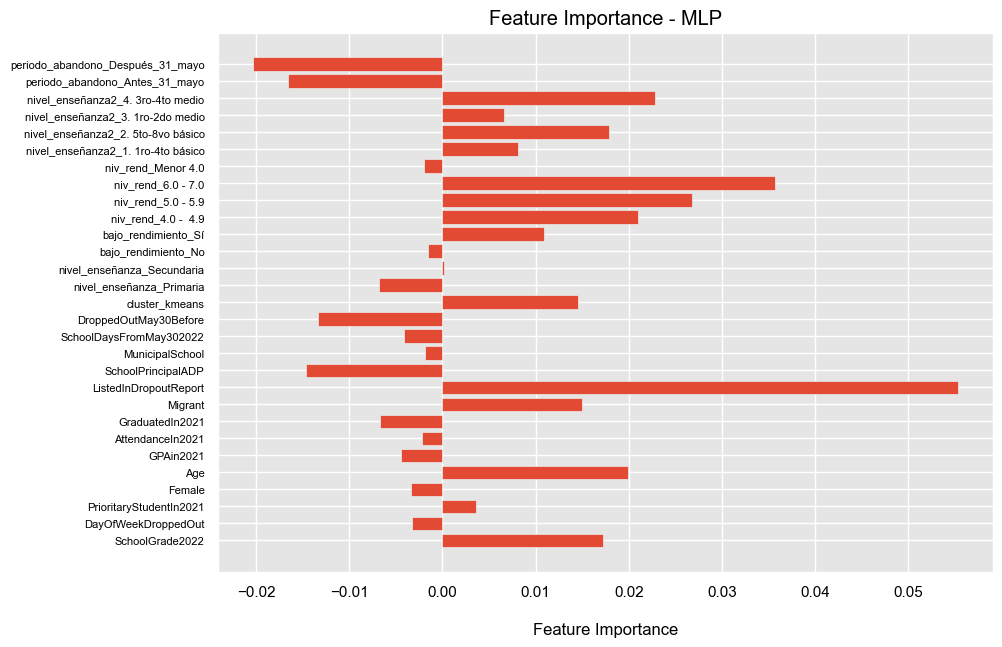

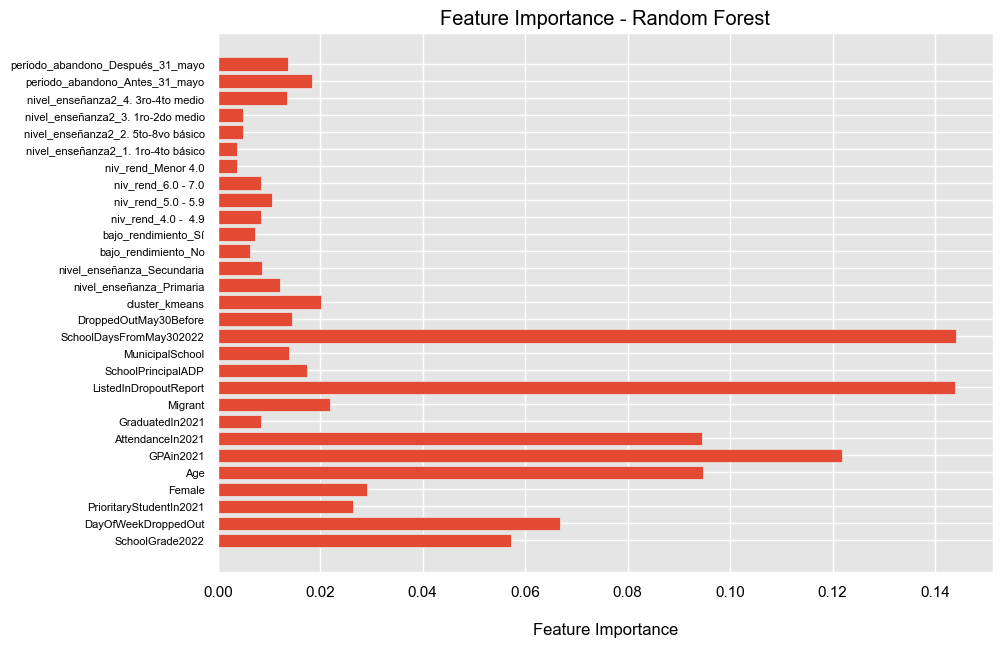

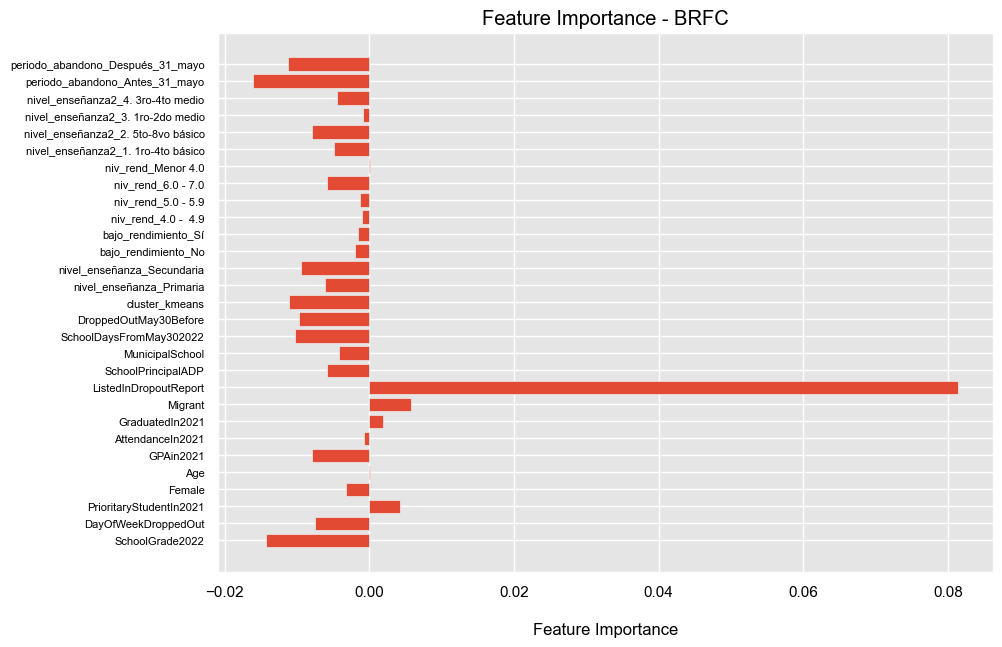

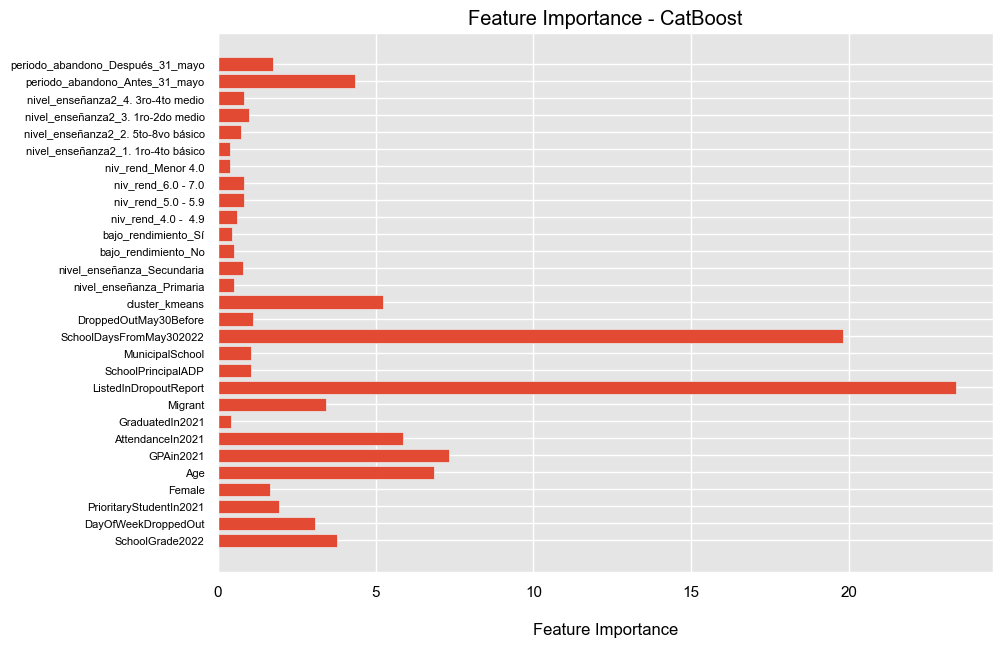

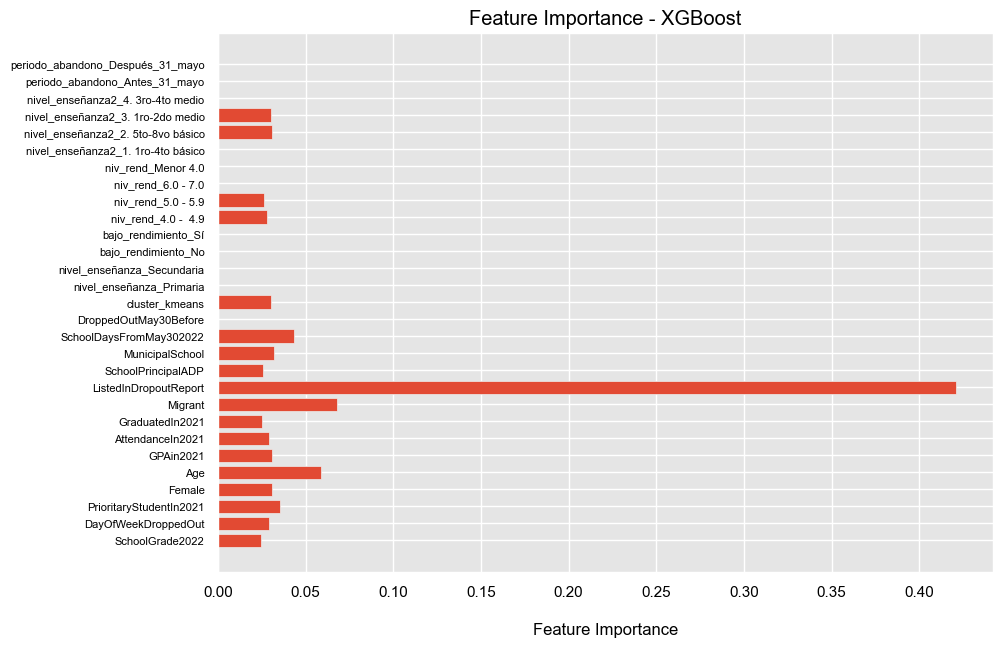

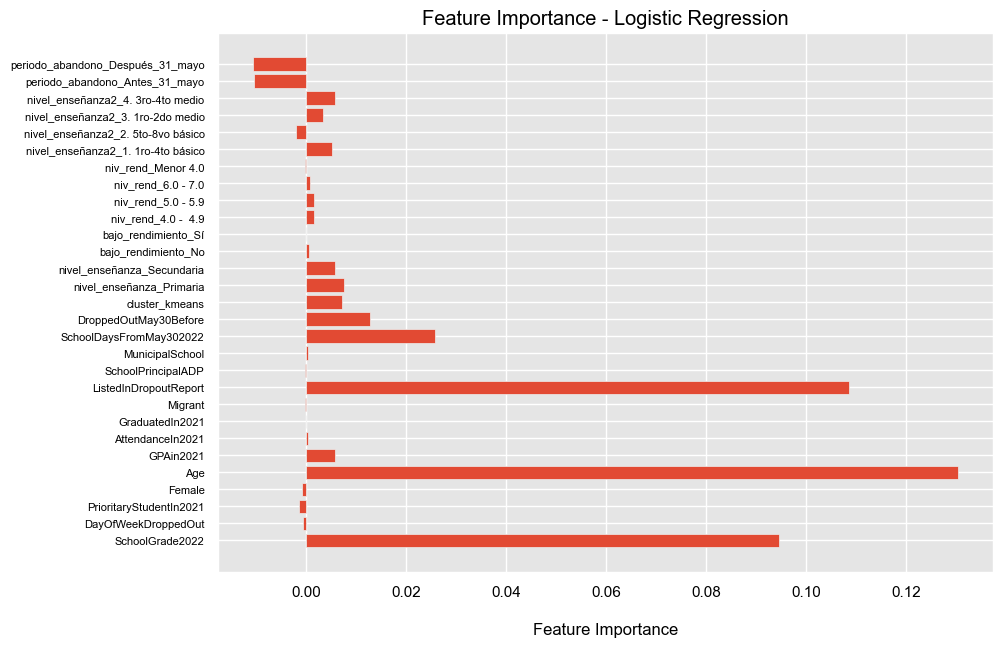

In [195]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario para guardar las importancias
feature_importances = {}

# Calcular Permutation Importance para cada modelo
for name, model in models_balanced_classes.items():
    print(f"Calculating Feature Importance for {name}...")
    
    if name in ['Random Forest', 'CatBoost', 'XGBoost']:
        # Modelos con método nativo de importancia
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
        else:
            print(f"{name} no tiene método 'feature_importances_'. Usando Permutation Importance.")
            result = permutation_importance(model, X_val_scaled, y_val, n_repeats=10, random_state=42)
            importance = result.importances_mean
    else:
        # Para MLP y Logistic Regression, usar Permutation Importance
        result = permutation_importance(model, X_val_scaled, y_val, n_repeats=10, random_state=42)
        importance = result.importances_mean

    # Guardar resultados
    feature_importances[name] = importance

# Obtener nombres de las columnas categóricas transformadas
encoded_categories = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Concatenar las columnas numéricas con las transformadas
feature_names = numerical_columns + list(encoded_categories)
# Graficar la importancia de características para cada modelo
for name, importance in feature_importances.items():
    plt.figure(figsize=(10, 7))
    plt.barh(feature_names, importance)
    plt.xlabel('\nFeature Importance', color='black')
    plt.title(f'Feature Importance - {name}', color='black')
    plt.yticks(color='black',size=8)
    plt.xticks(color='black')
    plt.show()

# Validación

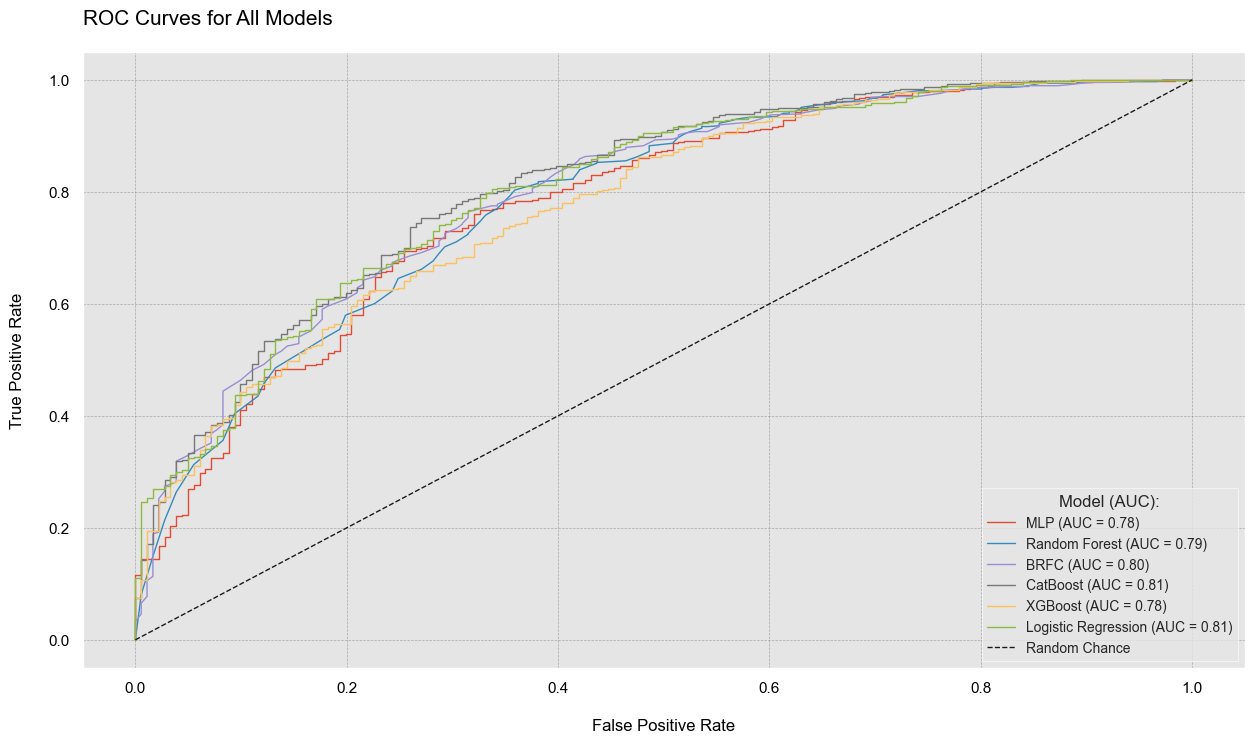

In [196]:
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Dictionary to store ROC data
roc_data = {}

# Train, predict probabilities, and compute ROC for each model
plt.figure(figsize=(15, 8))
for name, model in models.items():
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})',lw=1)

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Chance')  # Diagonal line
plt.title('ROC Curves for All Models', color='black', fontsize=15, loc='left', pad=20)
plt.xlabel('\nFalse Positive Rate', color='black', fontsize=12)
plt.xticks(color='black')
plt.yticks(color='black')
plt.ylabel('True Positive Rate\n', color='black', fontsize=12)
plt.legend(loc='lower right', fontsize=10, title='Model (AUC):', title_fontsize='12', shadow=False, fancybox=False, edgecolor='white')
plt.grid(True, alpha=0.6, linestyle='--', lw=0.5, color='gray', axis='both', zorder=1)
plt.show()

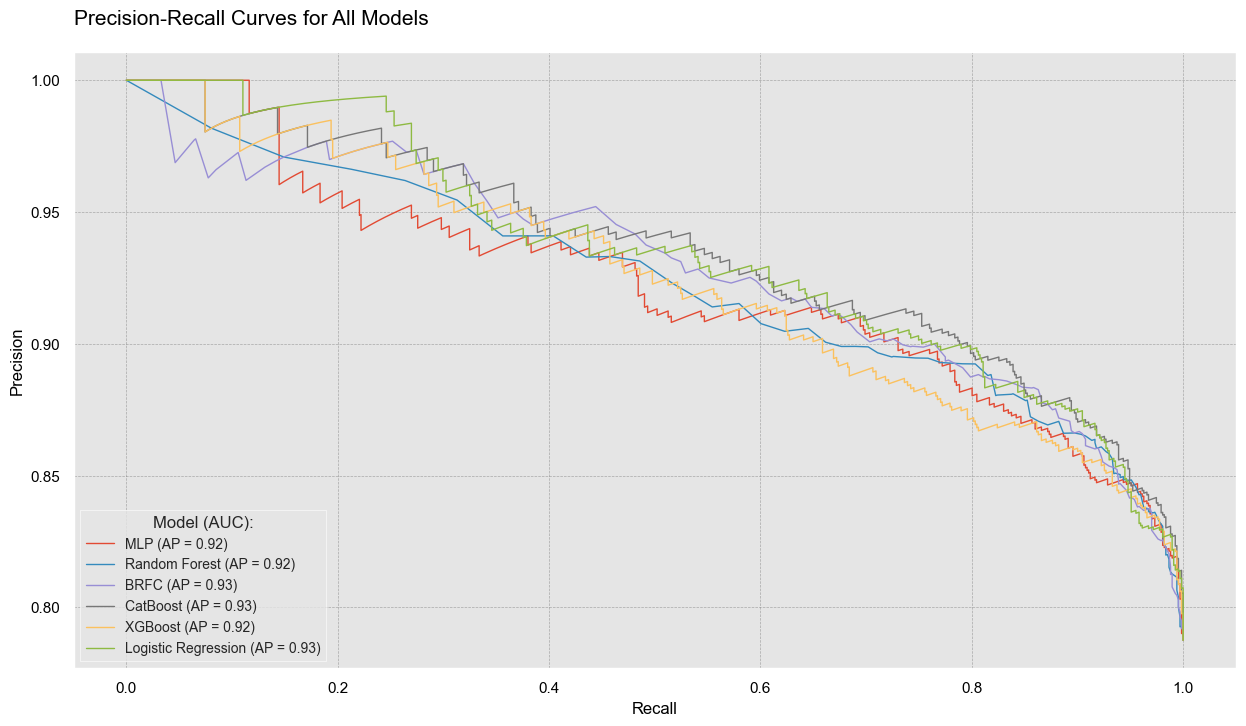

In [198]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Dictionary to store Precision-Recall data
pr_data = {}

# Train, predict probabilities, and compute Precision-Recall for each model
plt.figure(figsize=(15, 8))
for name, model in models.items():
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute Precision-Recall curve and Average Precision
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    pr_data[name] = (precision, recall, avg_precision)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.2f})', lw=1)

# Plot formatting
plt.title('Precision-Recall Curves for All Models', color='black', fontsize=15, loc='left', pad=20)
plt.xlabel('Recall', color='black', fontsize=12)
plt.ylabel('Precision', color='black', fontsize=12)
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(loc='lower left',fontsize=10, title='Model (AUC):', title_fontsize='12', shadow=False, fancybox=False, edgecolor='white')
plt.grid(True, alpha=0.6, linestyle='--', lw=0.5, color='gray', axis='both', zorder=1)
plt.show()



# Optimización de hiperparametros del mejor modelo anterior (Catboost)

In [199]:
import optuna
import mlflow
import mlflow.catboost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


def objective(trial):
    # Sugerir hiperparámetros
    params = {
        "iterations": trial.suggest_int("iterations", 500, 1000),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1, 10),
        "scale_pos_weight": trial.suggest_uniform("scale_pos_weight", 0.5, 2)
    }

    # Iniciar un experimento en MLflow
    with mlflow.start_run(nested=True):
        # Crear y entrenar el modelo
        model = CatBoostClassifier(
            iterations=params["iterations"],
            learning_rate=params["learning_rate"],
            depth=params["depth"],
            l2_leaf_reg=params["l2_leaf_reg"],
            scale_pos_weight=params["scale_pos_weight"],
            verbose=0, random_seed=42
        )
        model.fit(X_train_scaled, y_train, eval_set=(X_val_scaled, y_val), use_best_model=True)
        
        # Predicciones y métricas
        y_pred = model.predict(X_val_scaled)
        f1 = f1_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        accuracy = accuracy_score(y_val, y_pred)

        # Registrar parámetros y métricas en MLflow
        mlflow.log_params(params)
        mlflow.log_metrics({"f1": f1, "precision": precision, "recall": recall, "accuracy": accuracy})
        
        # Optuna optimiza solo el F1-Score
        return f1


# Ejecutar la optimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Mejor configuración
print("Best parameters:", study.best_params)
print("Best F1-Score:", study.best_value)


[I 2024-12-21 13:50:03,243] A new study created in memory with name: no-name-017e218e-0b80-401d-b15c-5e9fb7d27fbe
[I 2024-12-21 13:50:07,780] Trial 0 finished with value: 0.8900369003690037 and parameters: {'iterations': 937, 'learning_rate': 0.02216325049040539, 'depth': 7, 'l2_leaf_reg': 2.534398575550366, 'scale_pos_weight': 0.544789462567002}. Best is trial 0 with value: 0.8900369003690037.
[I 2024-12-21 13:50:16,451] Trial 1 finished with value: 0.8993103448275862 and parameters: {'iterations': 991, 'learning_rate': 0.08007530536326687, 'depth': 9, 'l2_leaf_reg': 1.4896205722210192, 'scale_pos_weight': 1.3713342999919949}. Best is trial 1 with value: 0.8993103448275862.
[I 2024-12-21 13:50:20,348] Trial 2 finished with value: 0.8996491228070176 and parameters: {'iterations': 731, 'learning_rate': 0.041822627211865596, 'depth': 7, 'l2_leaf_reg': 4.801441907856047, 'scale_pos_weight': 0.8899336720294267}. Best is trial 2 with value: 0.8996491228070176.
[I 2024-12-21 13:50:22,545] Tr

Best parameters: {'iterations': 722, 'learning_rate': 0.016070436266368632, 'depth': 7, 'l2_leaf_reg': 9.234970718193876, 'scale_pos_weight': 0.7601226901233468}
Best F1-Score: 0.905982905982906


In [200]:
# Visualizar interacción entre parámetros y la relación con la variable a optimizar (F1)
import optuna.visualization as vis

fig = vis.plot_parallel_coordinate(study)
fig.show()

In [201]:
# Mostrar la importancia de los hiperparámetros
fig = vis.plot_param_importances(study)
fig.show()


In [174]:
best_params = study.best_params
print("Best parameters:", best_params)
print("Best F1-Score:", study.best_value)

# Entrenar el mejor modelo
best_model = CatBoostClassifier(
    iterations=best_params["iterations"],
    learning_rate=best_params["learning_rate"],
    depth=best_params["depth"],
    l2_leaf_reg=best_params["l2_leaf_reg"],
    scale_pos_weight=best_params["scale_pos_weight"],
    verbose=0, random_seed=42
)

best_model.fit(X_train_scaled, y_train, eval_set=(X_val_scaled, y_val), use_best_model=True)

# Guardar el modelo
best_model.save_model("best_catboost_model.cbm")

Best parameters: {'iterations': 562, 'learning_rate': 0.01421929756236136, 'depth': 6, 'l2_leaf_reg': 1.620022417856418, 'scale_pos_weight': 0.7372901027751833}
Best F1-Score: 0.9045584045584045


## Evaluación de generalización fuera de muestra (TEST DATA)

Classification Report:
              precision    recall  f1-score     support
0.0            0.647541  0.436464  0.521452  181.000000
1.0            0.860274  0.935917  0.896502  671.000000
accuracy       0.829812  0.829812  0.829812    0.829812
macro avg      0.753907  0.686190  0.708977  852.000000
weighted avg   0.815081  0.829812  0.816826  852.000000


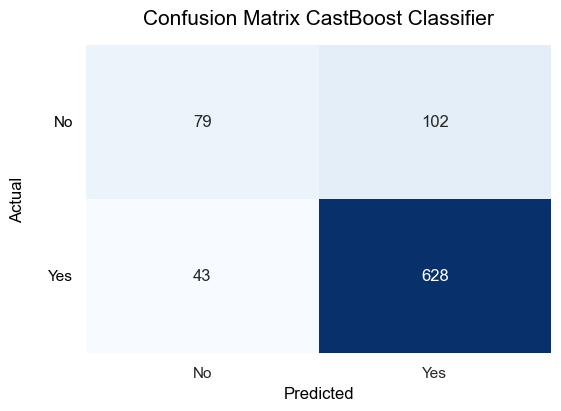


Test Set Metrics:
Accuracy: 0.8298
Precision (class 1): 0.8603
Recall (class 1): 0.9359
F1-Score (class 1): 0.8965

Test Set Metrics:
Accuracy: 0.8298
Precision (class 0): 0.6475
Recall (class 0): 0.4365
F1-Score (class 0): 0.5215


In [335]:
from sklearn.metrics import confusion_matrix

# Predicciones sobre el conjunto de prueba
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva

# Generar métricas de clasificación
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Mostrar el reporte como tabla
print("Classification Report:")
print(report_df)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cbar=False)
plt.title('Confusion Matrix CastBoost Classifier', color='black', fontsize=15, pad=15)
plt.xlabel('Predicted', color='black')
plt.yticks(rotation=0, color='black')
plt.ylabel('Actual\n', color='black')
plt.show()


# Métricas adicionales
print("\nTest Set Metrics:")
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Precision (class 1): {report['1.0']['precision']:.4f}")
print(f"Recall (class 1): {report['1.0']['recall']:.4f}")
print(f"F1-Score (class 1): {report['1.0']['f1-score']:.4f}")

# Métricas adicionales
print("\nTest Set Metrics:")
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Precision (class 0): {report['0.0']['precision']:.4f}")
print(f"Recall (class 0): {report['0.0']['recall']:.4f}")
print(f"F1-Score (class 0): {report['0.0']['f1-score']:.4f}")


In [176]:
import optuna
import mlflow
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


def objective(trial):
    # Sugerir hiperparámetros
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 4, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False])
    }


    # Iniciar un experimento en MLflow
    with mlflow.start_run(nested=True):
        # Crear y entrenar el modelo
        model = BalancedRandomForestClassifier(
            n_estimators=params["n_estimators"],
            max_depth=params["max_depth"],
            min_samples_split=params["min_samples_split"],
            min_samples_leaf=params["min_samples_leaf"],
            max_features=params["max_features"],
            bootstrap=params["bootstrap"],
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        
        # Predicciones y métricas
        y_pred = model.predict(X_val_scaled)
        f1 = f1_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        accuracy = accuracy_score(y_val, y_pred)

        # Registrar parámetros y métricas en MLflow
        mlflow.log_params(params)
        mlflow.log_metrics({"f1": f1, "precision": precision, "recall": recall, "accuracy": accuracy})
        
        # Optuna optimiza solo el F1-Score
        return f1

# Ejecutar la optimización
study2 = optuna.create_study(direction="maximize")
study2.optimize(objective, n_trials=100)

# Mejor configuración
print("Best parameters:", study.best_params)
print("Best F1-Score:", study.best_value)



[I 2024-11-29 18:23:29,275] A new study created in memory with name: no-name-be253264-8f59-41fb-9c6d-e814140ef5eb
[I 2024-11-29 18:23:30,559] Trial 0 finished with value: 0.8302193338748984 and parameters: {'n_estimators': 166, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.8302193338748984.
[I 2024-11-29 18:23:32,516] Trial 1 finished with value: 0.8242027800490597 and parameters: {'n_estimators': 349, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8302193338748984.
[I 2024-11-29 18:23:35,167] Trial 2 finished with value: 0.8338709677419355 and parameters: {'n_estimators': 269, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.8338709677419355.
[I 2024-11-29 18:23:37,023] Trial 3 finished with value: 0.8247758761206194 a

Best parameters: {'iterations': 562, 'learning_rate': 0.01421929756236136, 'depth': 6, 'l2_leaf_reg': 1.620022417856418, 'scale_pos_weight': 0.7372901027751833}
Best F1-Score: 0.9045584045584045


In [177]:
# Visualizar interacción entre parámetros y la relación con la variable a optimizar (F1)
import optuna.visualization as vis

fig = vis.plot_parallel_coordinate(study2)
fig.show()

In [178]:
# Mostrar la importancia de los hiperparámetros
fig = vis.plot_param_importances(study2)
fig.show()

In [180]:
import joblib

# Crear y entrenar el BalancedRandomForestClassifier con los mejores parámetros
best_params2 = study2.best_params
best_model2 = BalancedRandomForestClassifier(
    n_estimators=best_params2["n_estimators"],
    max_depth=best_params2["max_depth"],
    min_samples_split=best_params2["min_samples_split"],
    min_samples_leaf=best_params2["min_samples_leaf"],
    max_features=best_params2["max_features"],
    bootstrap=best_params2["bootstrap"],
    random_state=42
)
best_model2.fit(X_train_scaled, y_train)

# Guardar el modelo
joblib.dump(best_model2, "best_BalancedRandomForest_model.pkl")

['best_BalancedRandomForest_model.pkl']

Classification Report:
              precision    recall  f1-score     support
0.0            0.442379  0.657459  0.528889  181.000000
1.0            0.893654  0.776453  0.830941  671.000000
accuracy       0.751174  0.751174  0.751174    0.751174
macro avg      0.668016  0.716956  0.679915  852.000000
weighted avg   0.797784  0.751174  0.766773  852.000000


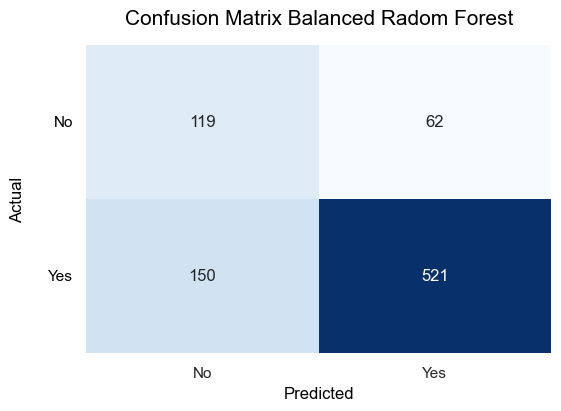


Test Set Metrics:
Accuracy: 0.7512
Precision (class 1): 0.8937
Recall (class 1): 0.7765
F1-Score (class 1): 0.8309

Test Set Metrics:
Accuracy: 0.7512
Precision (class 0): 0.4424
Recall (class 0): 0.6575
F1-Score (class 0): 0.5289


In [336]:
# Predecir probabilidades y clases
y_test_proba = best_model2.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva
y_test_pred = best_model2.predict(X_test_scaled)

# Generar métricas de clasificación
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Mostrar el reporte como tabla
print("Classification Report:")
print(report_df)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],cbar=False)
plt.title('Confusion Matrix Balanced Radom Forest', color='black', fontsize=15, pad=15)
plt.xlabel('Predicted', color='black')
plt.yticks(rotation=0, color='black')
plt.ylabel('Actual\n', color='black')
plt.show()

# Métricas adicionales
print("\nTest Set Metrics:")
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Precision (class 1): {report['1.0']['precision']:.4f}")
print(f"Recall (class 1): {report['1.0']['recall']:.4f}")
print(f"F1-Score (class 1): {report['1.0']['f1-score']:.4f}")


# Métricas adicionales
print("\nTest Set Metrics:")
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Precision (class 0): {report['0.0']['precision']:.4f}")
print(f"Recall (class 0): {report['0.0']['recall']:.4f}")
print(f"F1-Score (class 0): {report['0.0']['f1-score']:.4f}")





> Existe una mejora pequeña en las métricas sobre el conjunto de test en comparación al conjunto de evaluación.

# Recomendaciones

> Se recomienda utilizar CatBoost como modelo principal para predecir e identificar con alta precisión y recall a los estudiantes que se reincorporarán, debido a su rendimiento superior en el análisis y manejo eficiente de datos desbalanceados.